In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('DataModeling.csv')


split_index = int(len(data) * 2 / 3)

# Divide the data into training and test sets
train_set = data[:split_index]
test_set = data[split_index:]

# size of the datasets
print("Training Set Size:", len(train_set))
print("Test Set Size:", len(test_set))


Training Set Size: 2784
Test Set Size: 1392


In [2]:
train_set.head()

Abalone_id Gender  Length  Diameter  Height  Whole_weight  Shucked_weight   
0           1      M   0.455     0.365   0.095        0.5140          0.2245  \
1           2      M   0.350     0.265   0.090        0.2255          0.0995   
2           3      F   0.530     0.420   0.135        0.6770          0.2565   
3           4      M   0.440     0.365   0.125        0.5160          0.2155   
4           5      I   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  Collector Collector_First   
0          0.1010         0.150     15          5          Haniya  \
1          0.0485         0.070      7         15           Conan   
2          0.1415         0.210      9          9          Danica   
3          0.1140         0.155     10          8            Kali   
4          0.0395         0.055      7          8            Kali   

  Collector_last               Collector_organization  Water   
0         Talley  Prince William Sound Science Center      2  \
1         Dalton                University of Houston      6   
2          Tyler              University of Florida\t      1   
3       Metcalfe               Mote Marine Laboratory      6   
4       Metcalfe               Mote Marine Laboratory     10   

             Water_region  Feb_temp  
0      Florida Gulf Coast      18.0  
1        Gulf of Mexico\t      14.1  
2  Florida Atlantic Coast      22.1  
3        Gulf of Mexico\t      14.1  
4                 Pacific      24.1

In [3]:
train_set.columns

Index(['Abalone_id', 'Gender', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings',
       'Collector', 'Collector_First', 'Collector_last',
       'Collector_organization', 'Water', 'Water_region', 'Feb_temp'],
      dtype='object')

In [4]:
# Find relationships among variables in stacked data 

In [5]:
numerical_vars = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
df = train_set[numerical_vars]

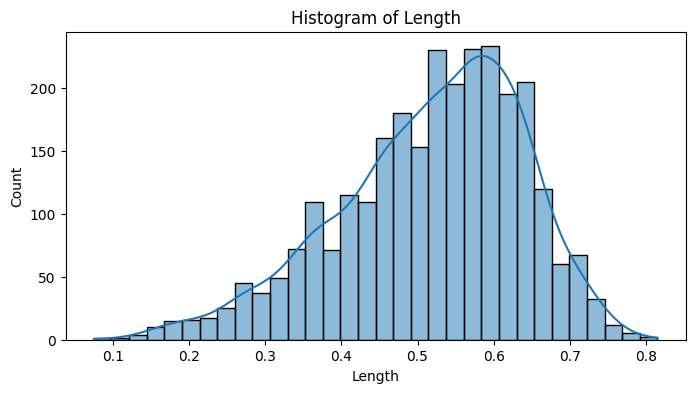

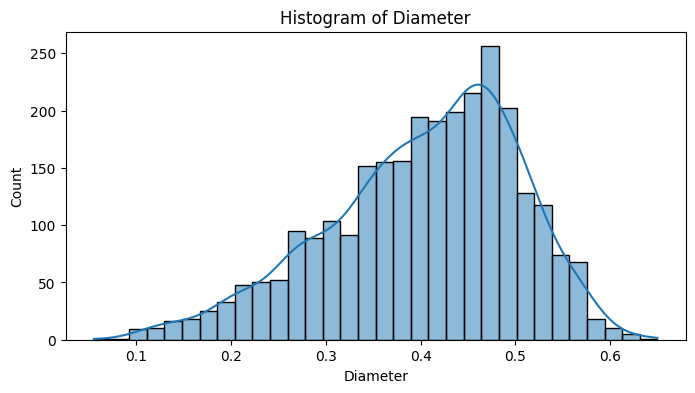

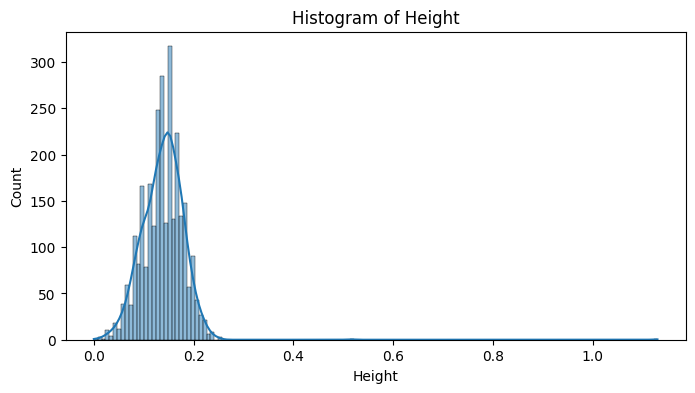

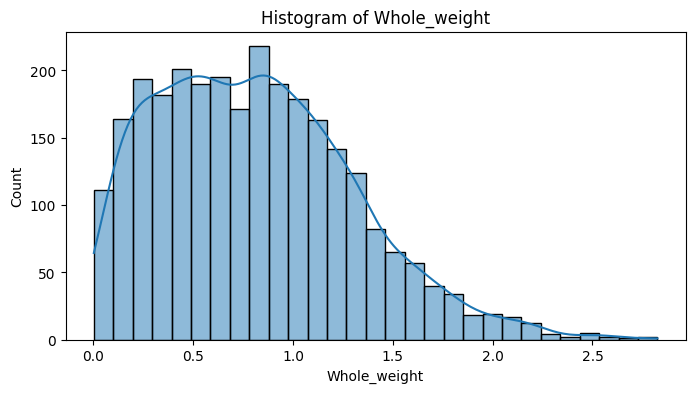

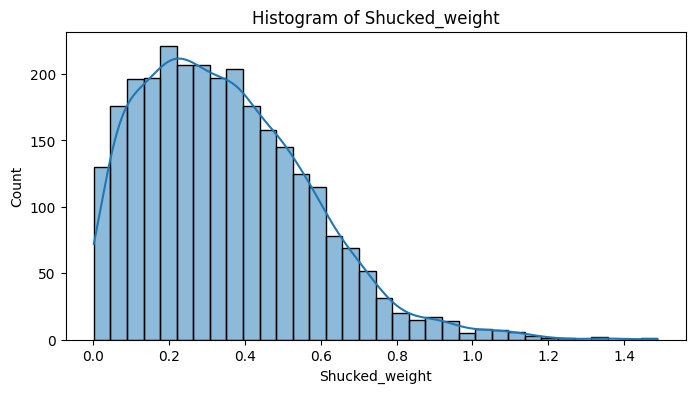

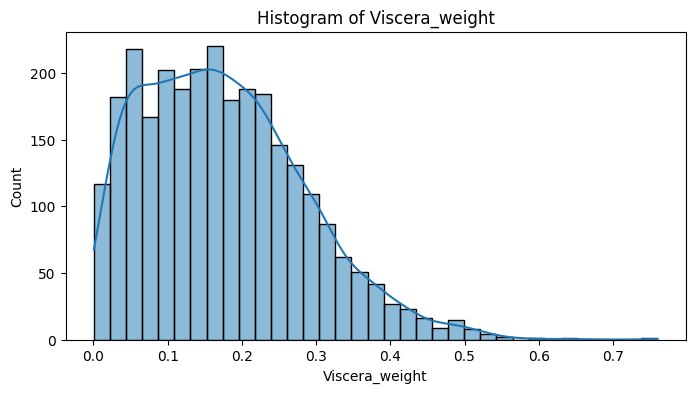

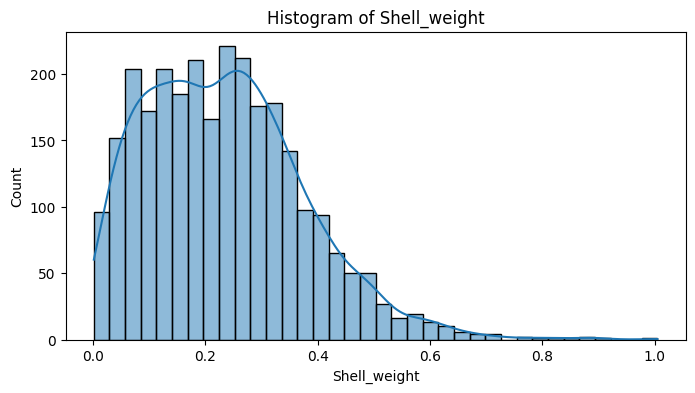

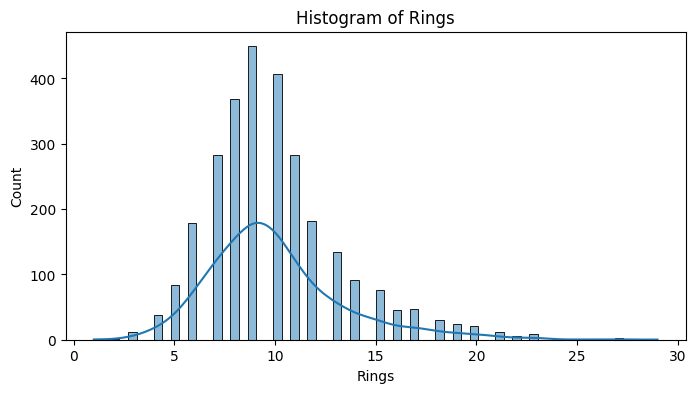

In [6]:
def plot_histograms(data, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.show()


plot_histograms(df, numerical_vars)  


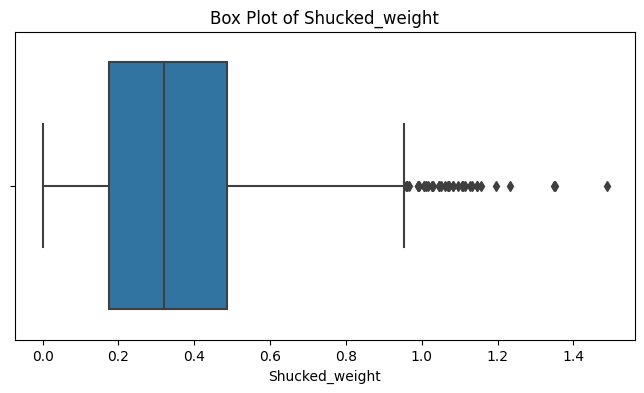

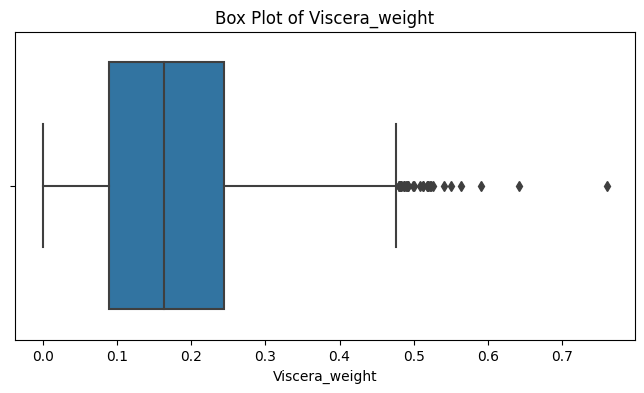

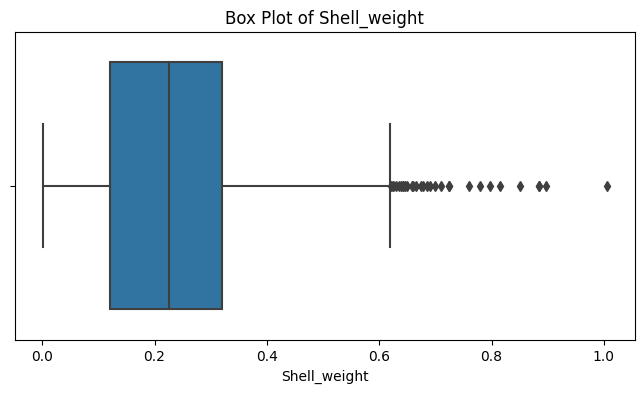

In [7]:
def plot_boxplots(data, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

plot_boxplots(df, ['Shucked_weight', 'Viscera_weight', 'Shell_weight'])


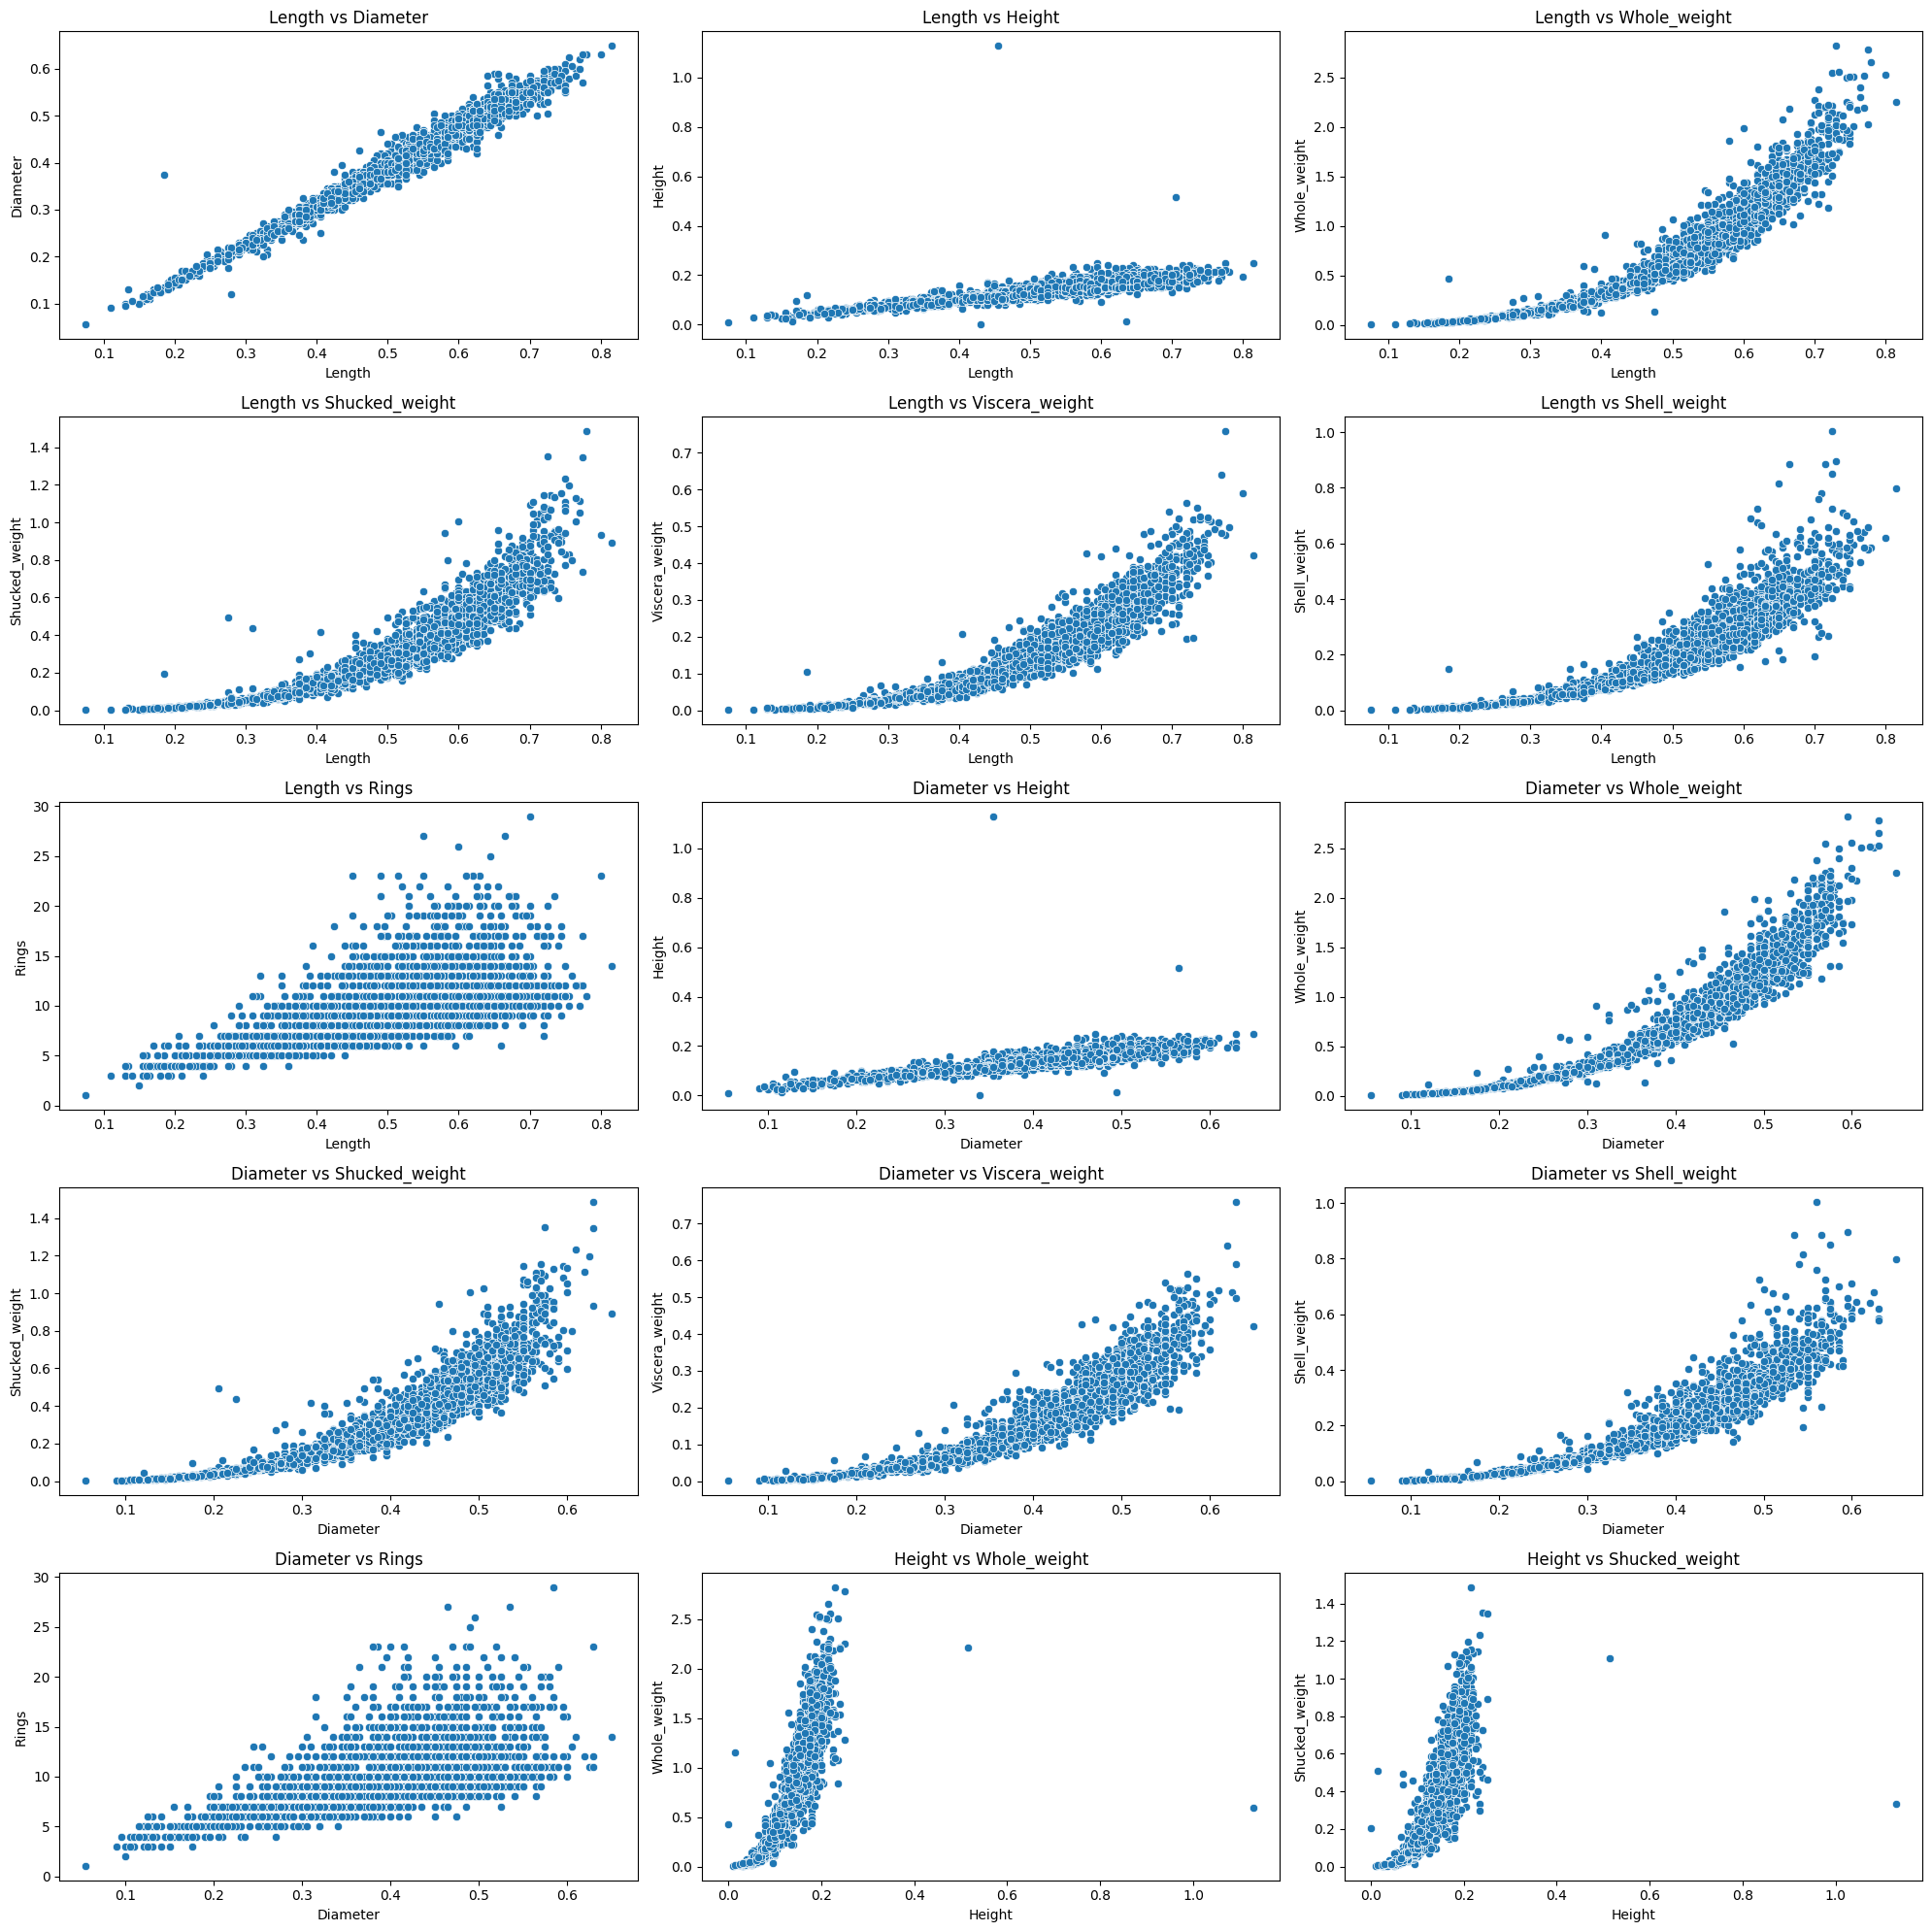

In [8]:
import itertools

# Create a list of all possible pairs from the numerical variables
pairs = list(itertools.combinations(numerical_vars, 2))

# Function to plot scatter plots for the given pairs of variables
def plot_scatter_plots(df, pairs):
    
    sample_pairs = pairs[:15] 
    plt.figure(figsize=(20, 20))
    for i, pair in enumerate(sample_pairs):
        plt.subplot(5, 3, i + 1)
        sns.scatterplot(x=df[pair[0]], y=df[pair[1]])
        plt.title(f'{pair[0]} vs {pair[1]}')
    plt.tight_layout()
    plt.show()

plot_scatter_plots(df, pairs)


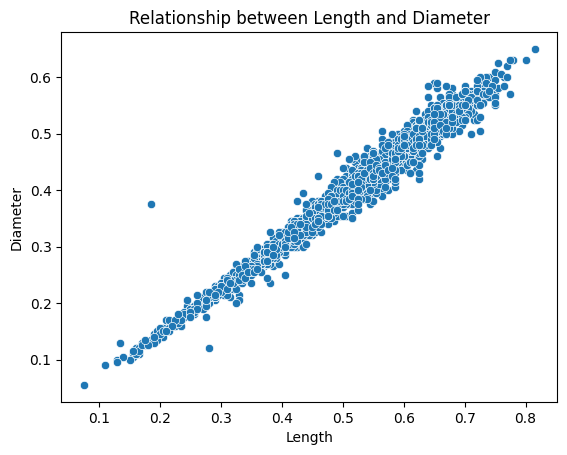

In [10]:
sns.scatterplot(x=df['Length'], y=df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title(f'Relationship between Length and Diameter')
plt.show()

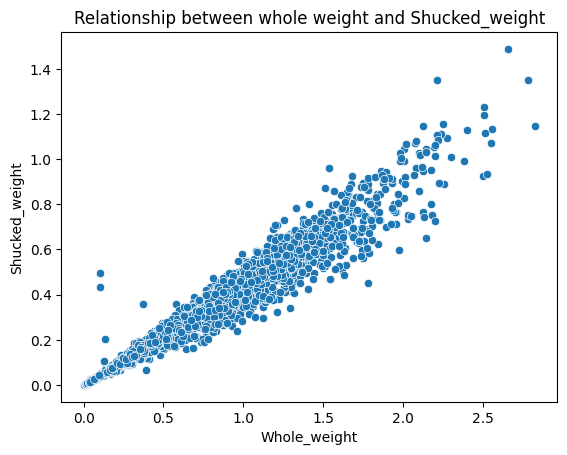

In [11]:
sns.scatterplot(x=df['Whole_weight'], y=df['Shucked_weight'])
plt.xlabel('Whole_weight')
plt.ylabel('Shucked_weight')
plt.title(f'Relationship between whole weight and Shucked_weight')
plt.show()

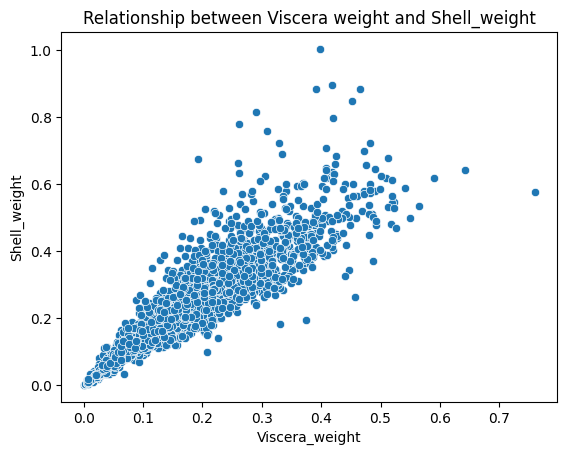

In [12]:
sns.scatterplot(x=df['Viscera_weight'], y=df['Shell_weight'])
plt.xlabel('Viscera_weight')
plt.ylabel('Shell_weight')
plt.title(f'Relationship between Viscera weight and Shell_weight')
plt.show()

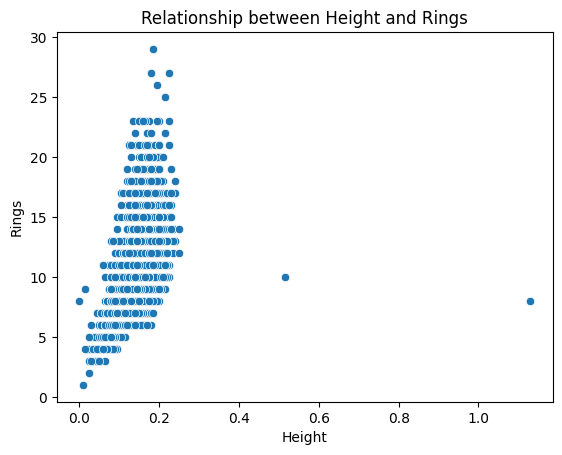

In [13]:
sns.scatterplot(x=df['Height'], y=df['Rings'])
plt.xlabel('Height')
plt.ylabel('Rings')
plt.title(f'Relationship between Height and Rings')
plt.show()

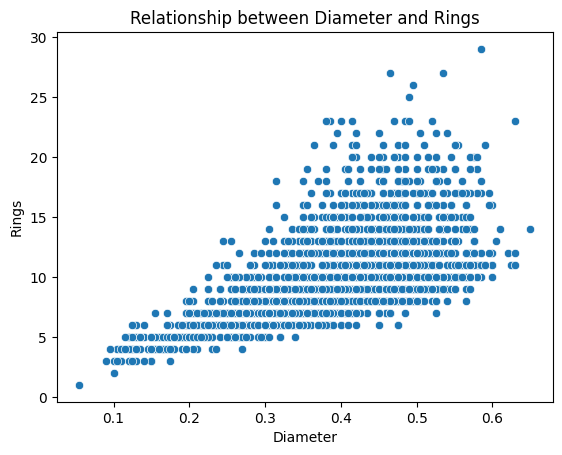

In [14]:
sns.scatterplot(x=df['Diameter'], y=df['Rings'])
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.title(f'Relationship between Diameter and Rings')
plt.show()

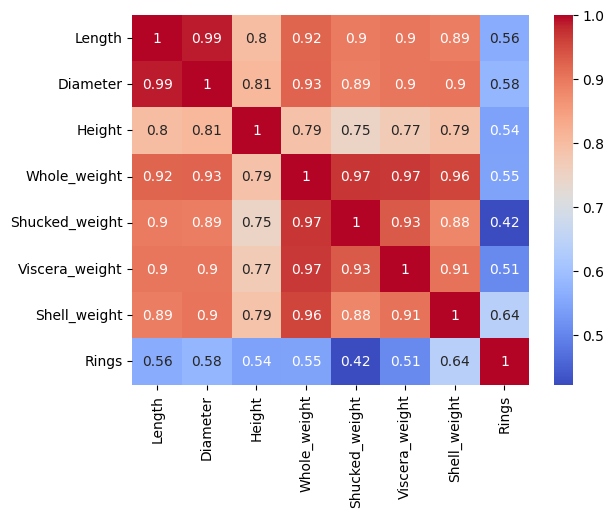

In [15]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



In [16]:
strongest_correlations = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
top_5_correlations = strongest_correlations.head(6)  
top_5_correlations


Length          Length            1.000000
Diameter        Length            0.987081
Shucked_weight  Whole_weight      0.969208
Viscera_weight  Whole_weight      0.967251
Whole_weight    Shell_weight      0.955998
Viscera_weight  Shucked_weight    0.934391
dtype: float64

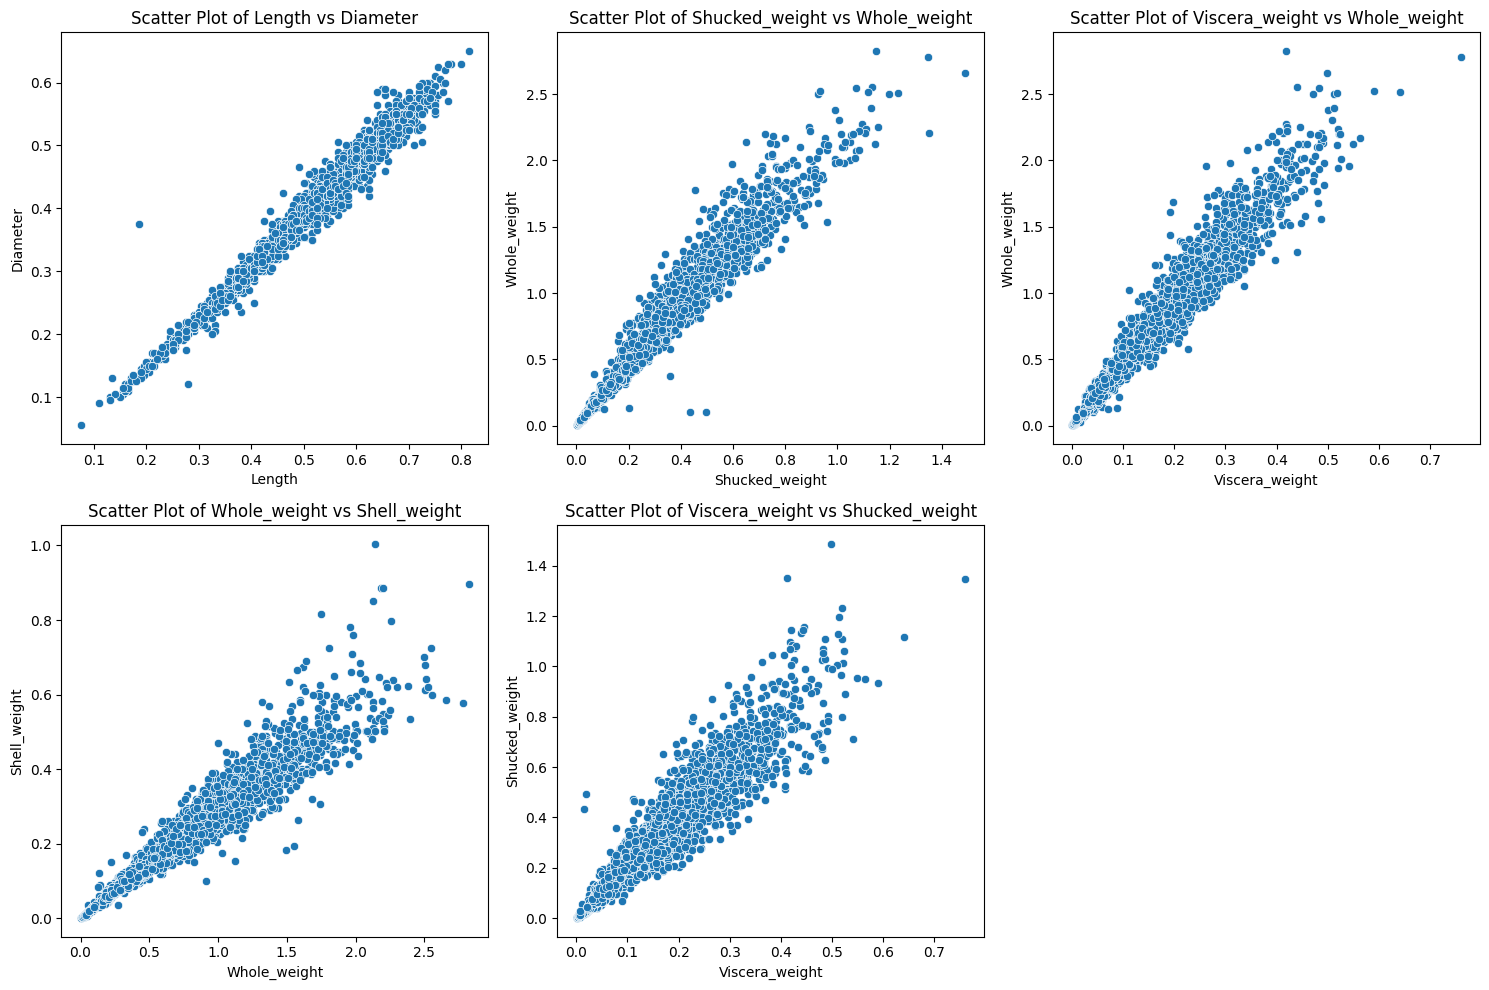

In [17]:
# pairs with the strongest correlations for scatter plot visualization
strong_pairs = [
    ('Length', 'Diameter'),
    ('Shucked_weight', 'Whole_weight'),
    ('Viscera_weight', 'Whole_weight'),
    ('Whole_weight', 'Shell_weight'),
    ('Viscera_weight', 'Shucked_weight')
]

# Function to plot scatter plots for the given pairs of variables
plt.figure(figsize=(15, 10))
for i, pair in enumerate(strong_pairs):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[pair[0]], y=df[pair[1]])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
plt.tight_layout()
plt.show()


# Build regression models for stacked data

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd




def build_and_evaluate_model(X_train,y_train, X_test, y_test):

    # Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    intercept = model.intercept_

    # Make predictions and compute MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return model.coef_[0], mse,intercept


variables = {
    'Length vs Diameter': ('Length', 'Diameter'),
    'Shucked Weight vs Whole Weight': ('Shucked_weight', 'Whole_weight'),
    'Viscera Weight vs Whole Weight': ('Viscera_weight', 'Whole_weight'),
    'Whole Weight vs Shell Weight': ('Whole_weight', 'Shell_weight'),
    'Viscera Weight vs Shucked Weight': ('Viscera_weight', 'Shucked_weight')
}


for name, (predictor, target) in variables.items():
    coef, mse,Intercept = build_and_evaluate_model(train_set[[predictor]], train_set[target],test_set[[predictor]], test_set[target])
    print(f"{name} - Coefficient: {coef:.4f},Intercept: {Intercept:.2f} , MSE: {mse:.6f}")


Length vs Diameter - Coefficient: 0.8172,Intercept: -0.02 , MSE: 0.000255
Shucked Weight vs Whole Weight - Coefficient: 2.1540,Intercept: 0.06 , MSE: 0.014008
Viscera Weight vs Whole Weight - Coefficient: 4.3670,Intercept: 0.04 , MSE: 0.016393
Whole Weight vs Shell Weight - Coefficient: 0.2748,Intercept: 0.01 , MSE: 0.001627
Viscera Weight vs Shucked Weight - Coefficient: 1.8982,Intercept: 0.02 , MSE: 0.006908


# Create unstacked data 

In [26]:
# Unstack the datasets based on gender
train_males = train_set[train_set['Gender'] == 'M']
train_females = train_set[train_set['Gender'] == 'F']
train_infants = train_set[train_set['Gender'] == 'I']

test_males = test_set[test_set['Gender'] == 'M']
test_females = test_set[test_set['Gender'] == 'F']
test_infants = test_set[test_set['Gender'] == 'I']


len(train_males), len(train_females), len(train_infants), len(test_males), len(test_females), len(test_infants)


(1018, 873, 893, 509, 434, 449)

# Find relationships among variables in unstacked data 

In [ ]:
numerical_vars = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']


In [ ]:
def plot_histograms(df, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.show()


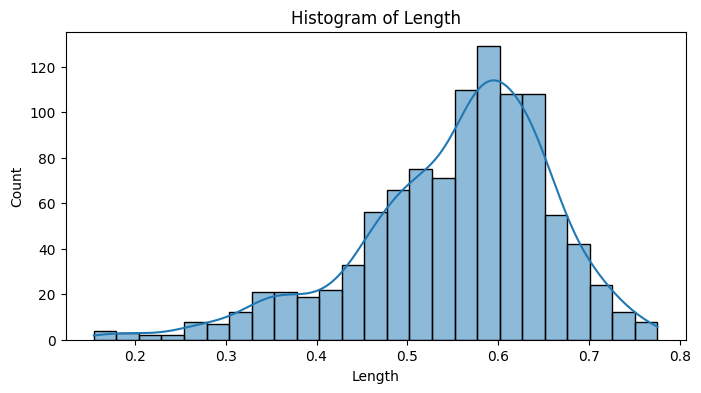

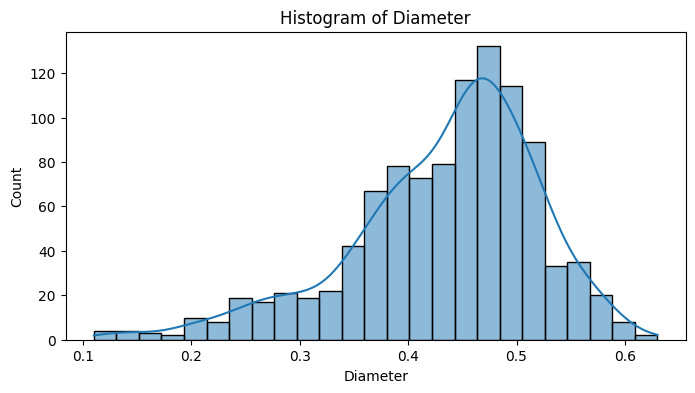

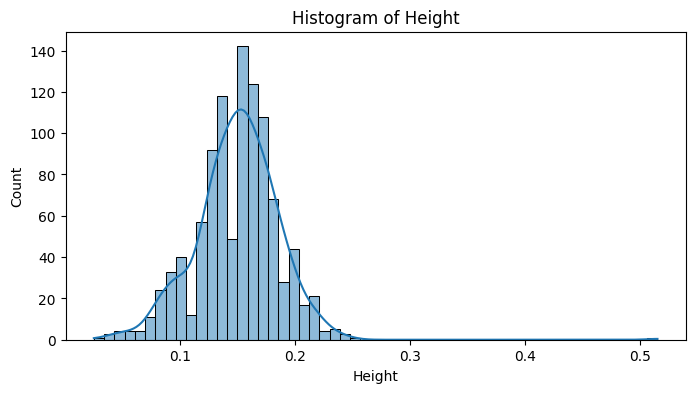

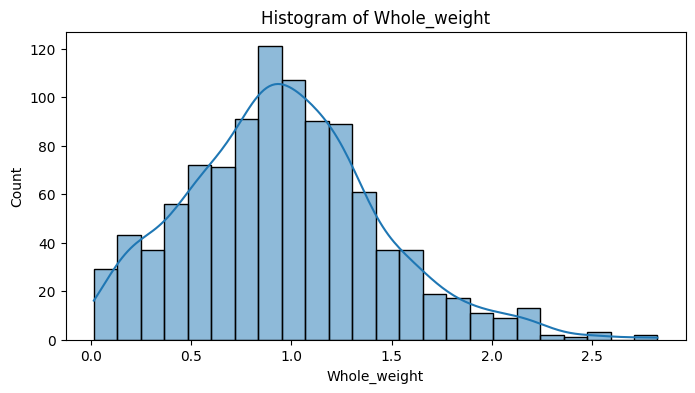

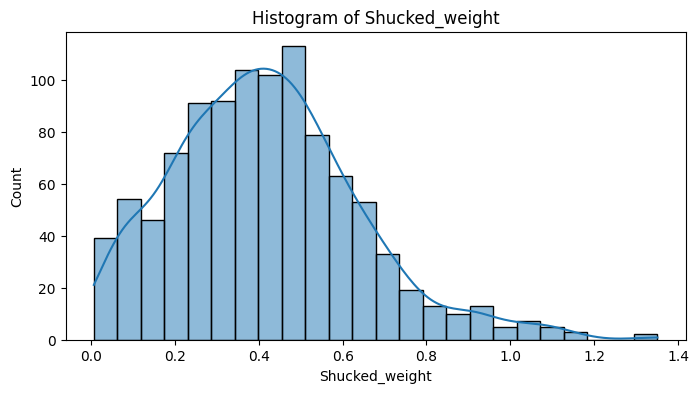

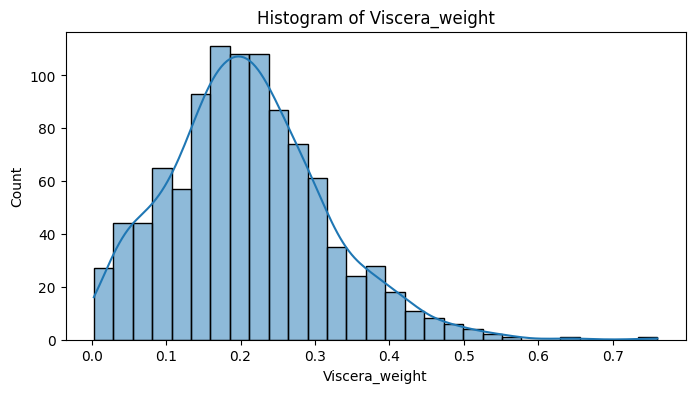

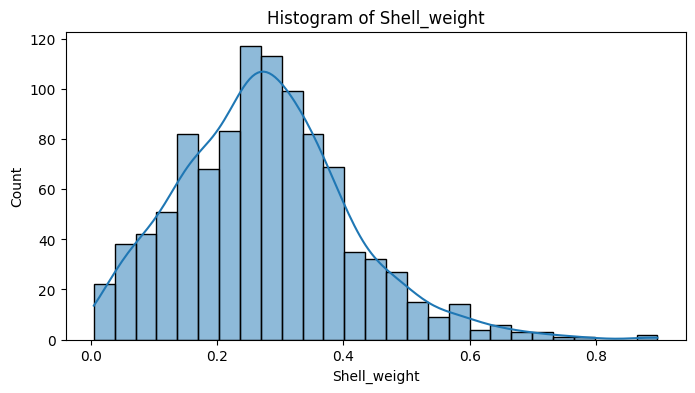

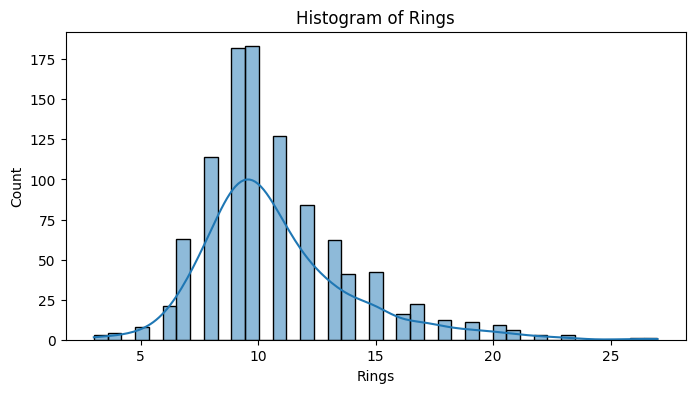

In [27]:
# Male
plot_histograms(train_males, numerical_vars)  


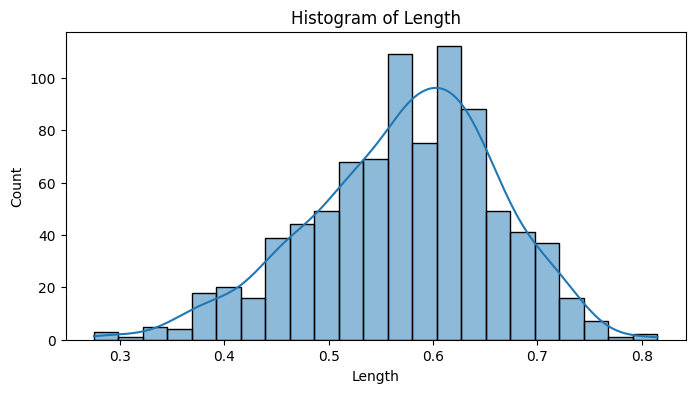

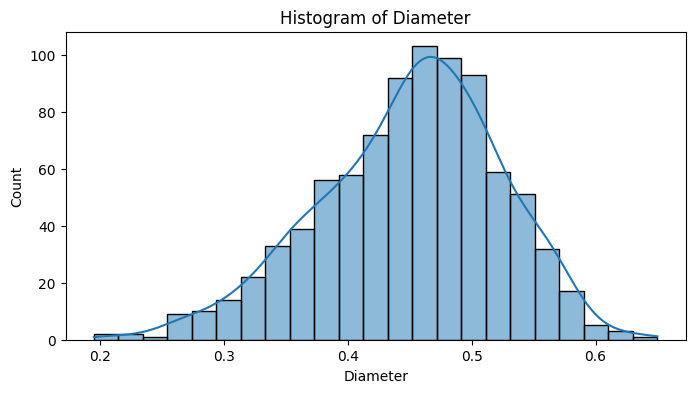

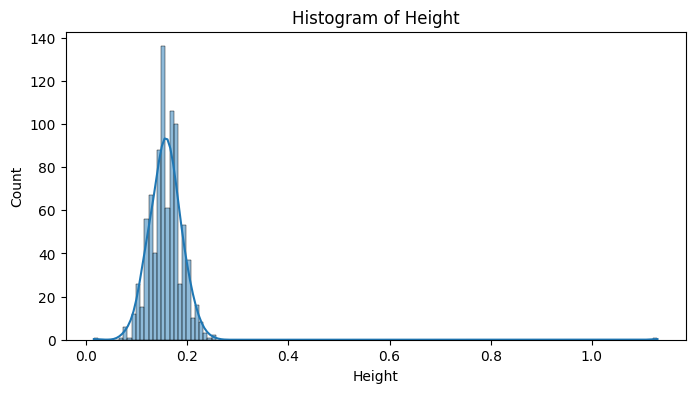

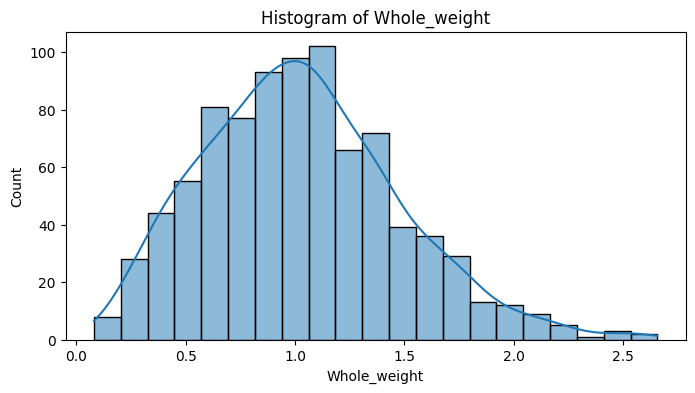

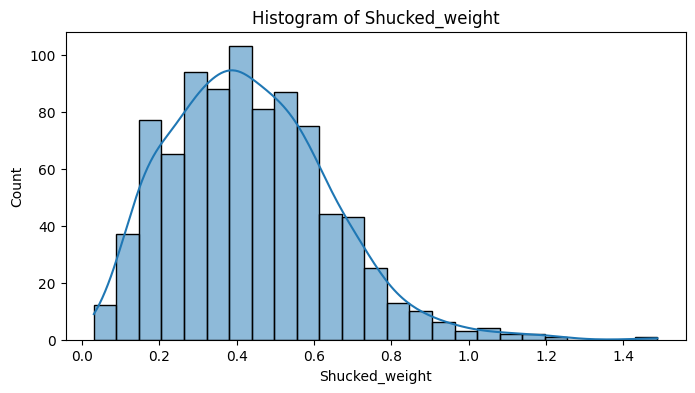

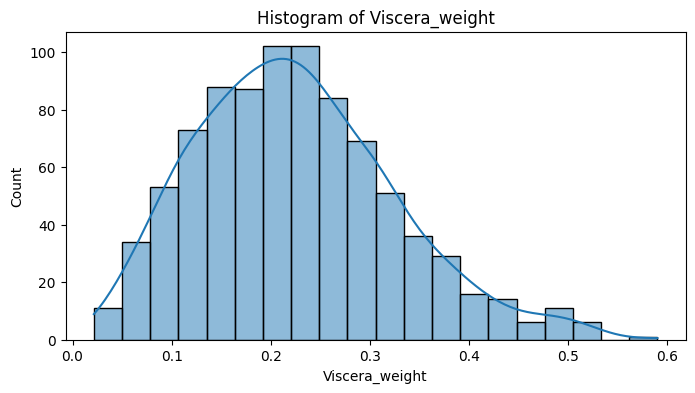

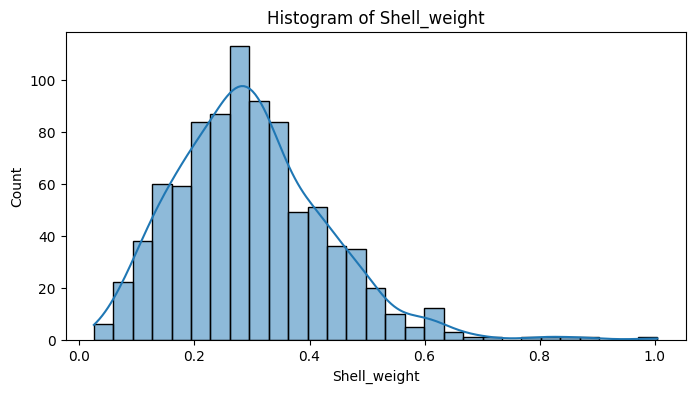

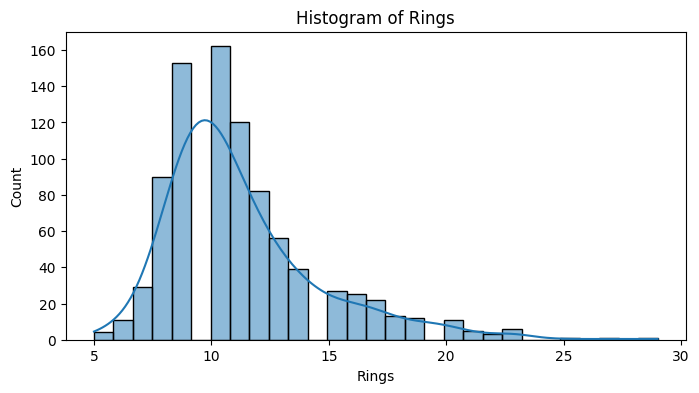

In [28]:
# Female
plot_histograms(train_females, numerical_vars)  


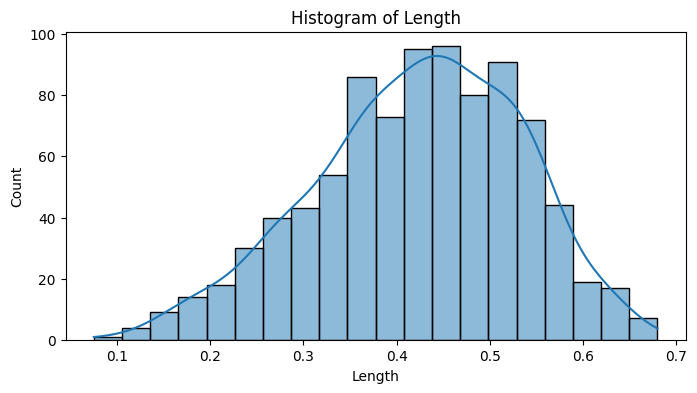

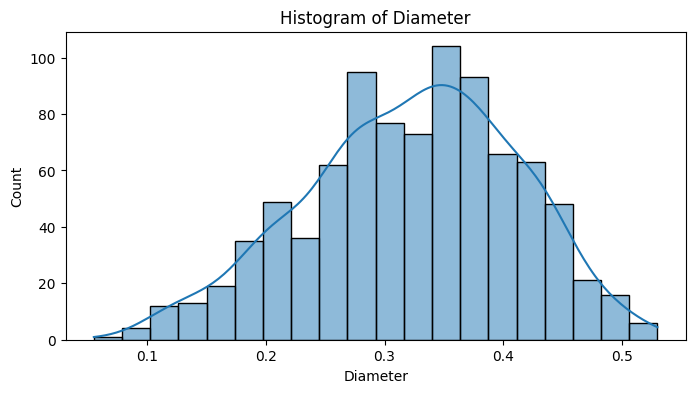

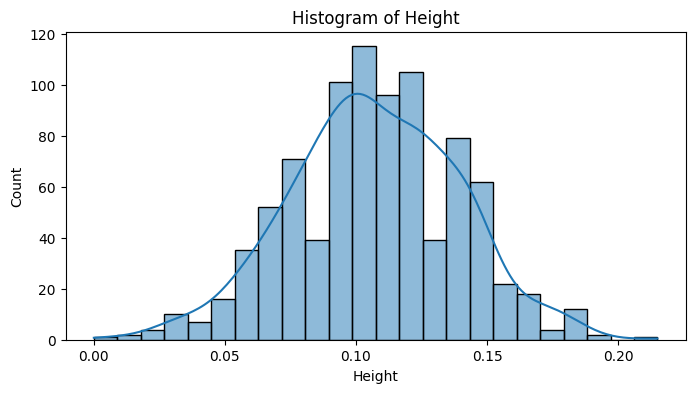

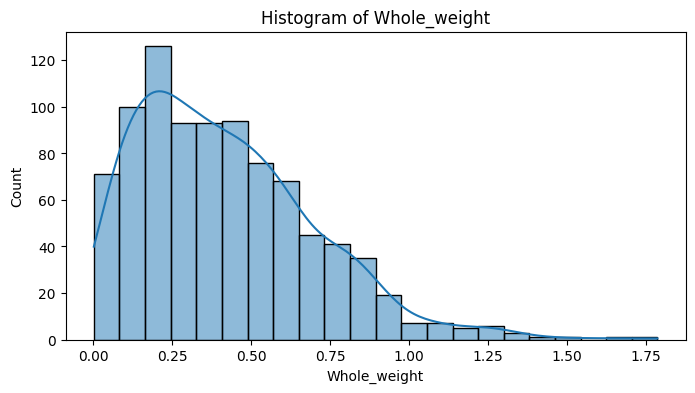

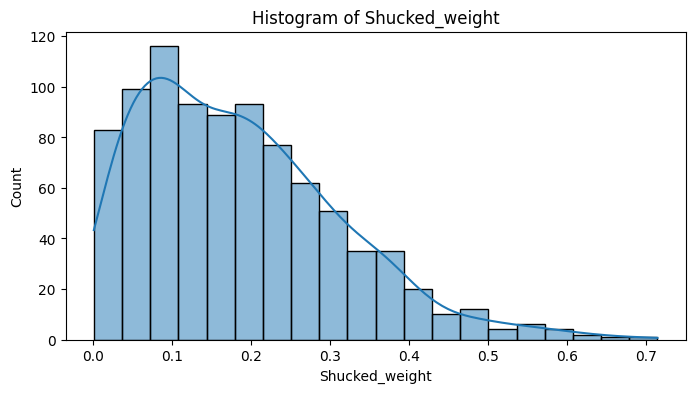

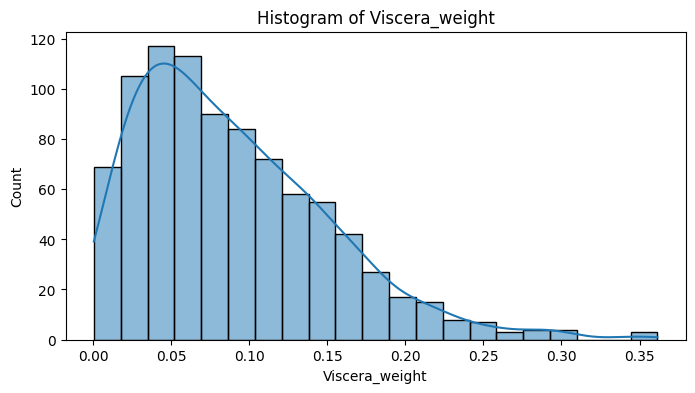

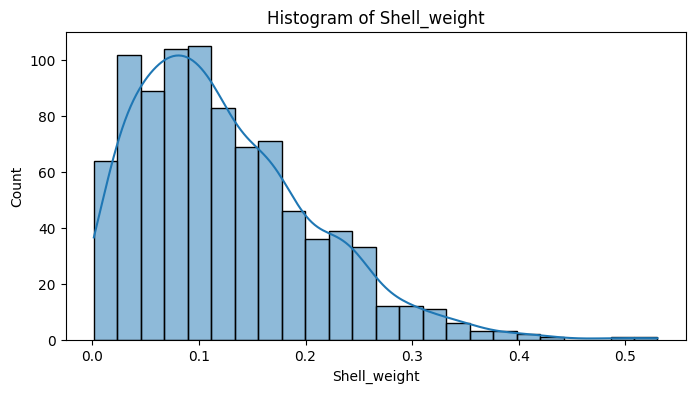

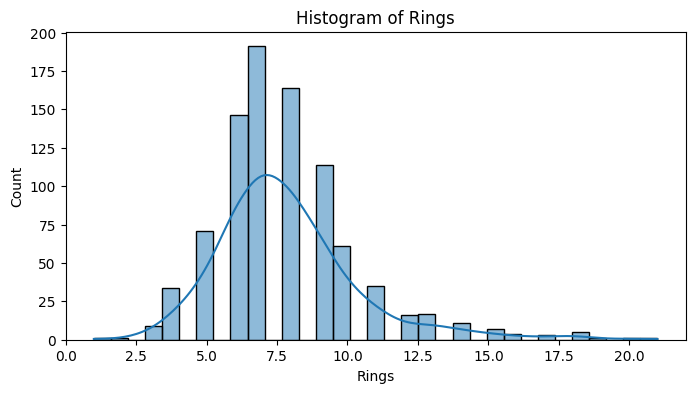

In [29]:
# Infants
plot_histograms(train_infants, numerical_vars)  


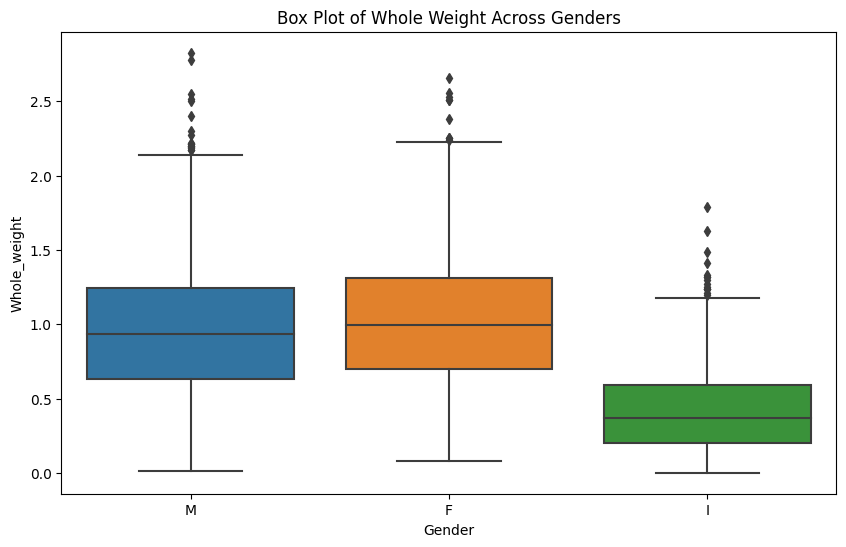

In [33]:
# Plotting the box plot for whole_weight across different genders
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Whole_weight', data=train_set)
plt.title('Box Plot of Whole Weight Across Genders')
plt.show()


In [39]:
pairs = list(itertools.combinations(numerical_vars, 2))

# Function to plot scatter plots for the given pairs of variables
def plot_scatter_plots(X, pairs):
    
    sample_pairs = pairs[:15] 
    plt.figure(figsize=(20, 20))
    for i, pair in enumerate(sample_pairs):
        plt.subplot(5, 3, i + 1)
        sns.scatterplot(x=X[pair[0]], y=X[pair[1]])
        plt.title(f'{pair[0]} vs {pair[1]}')
    plt.tight_layout()
    plt.show()




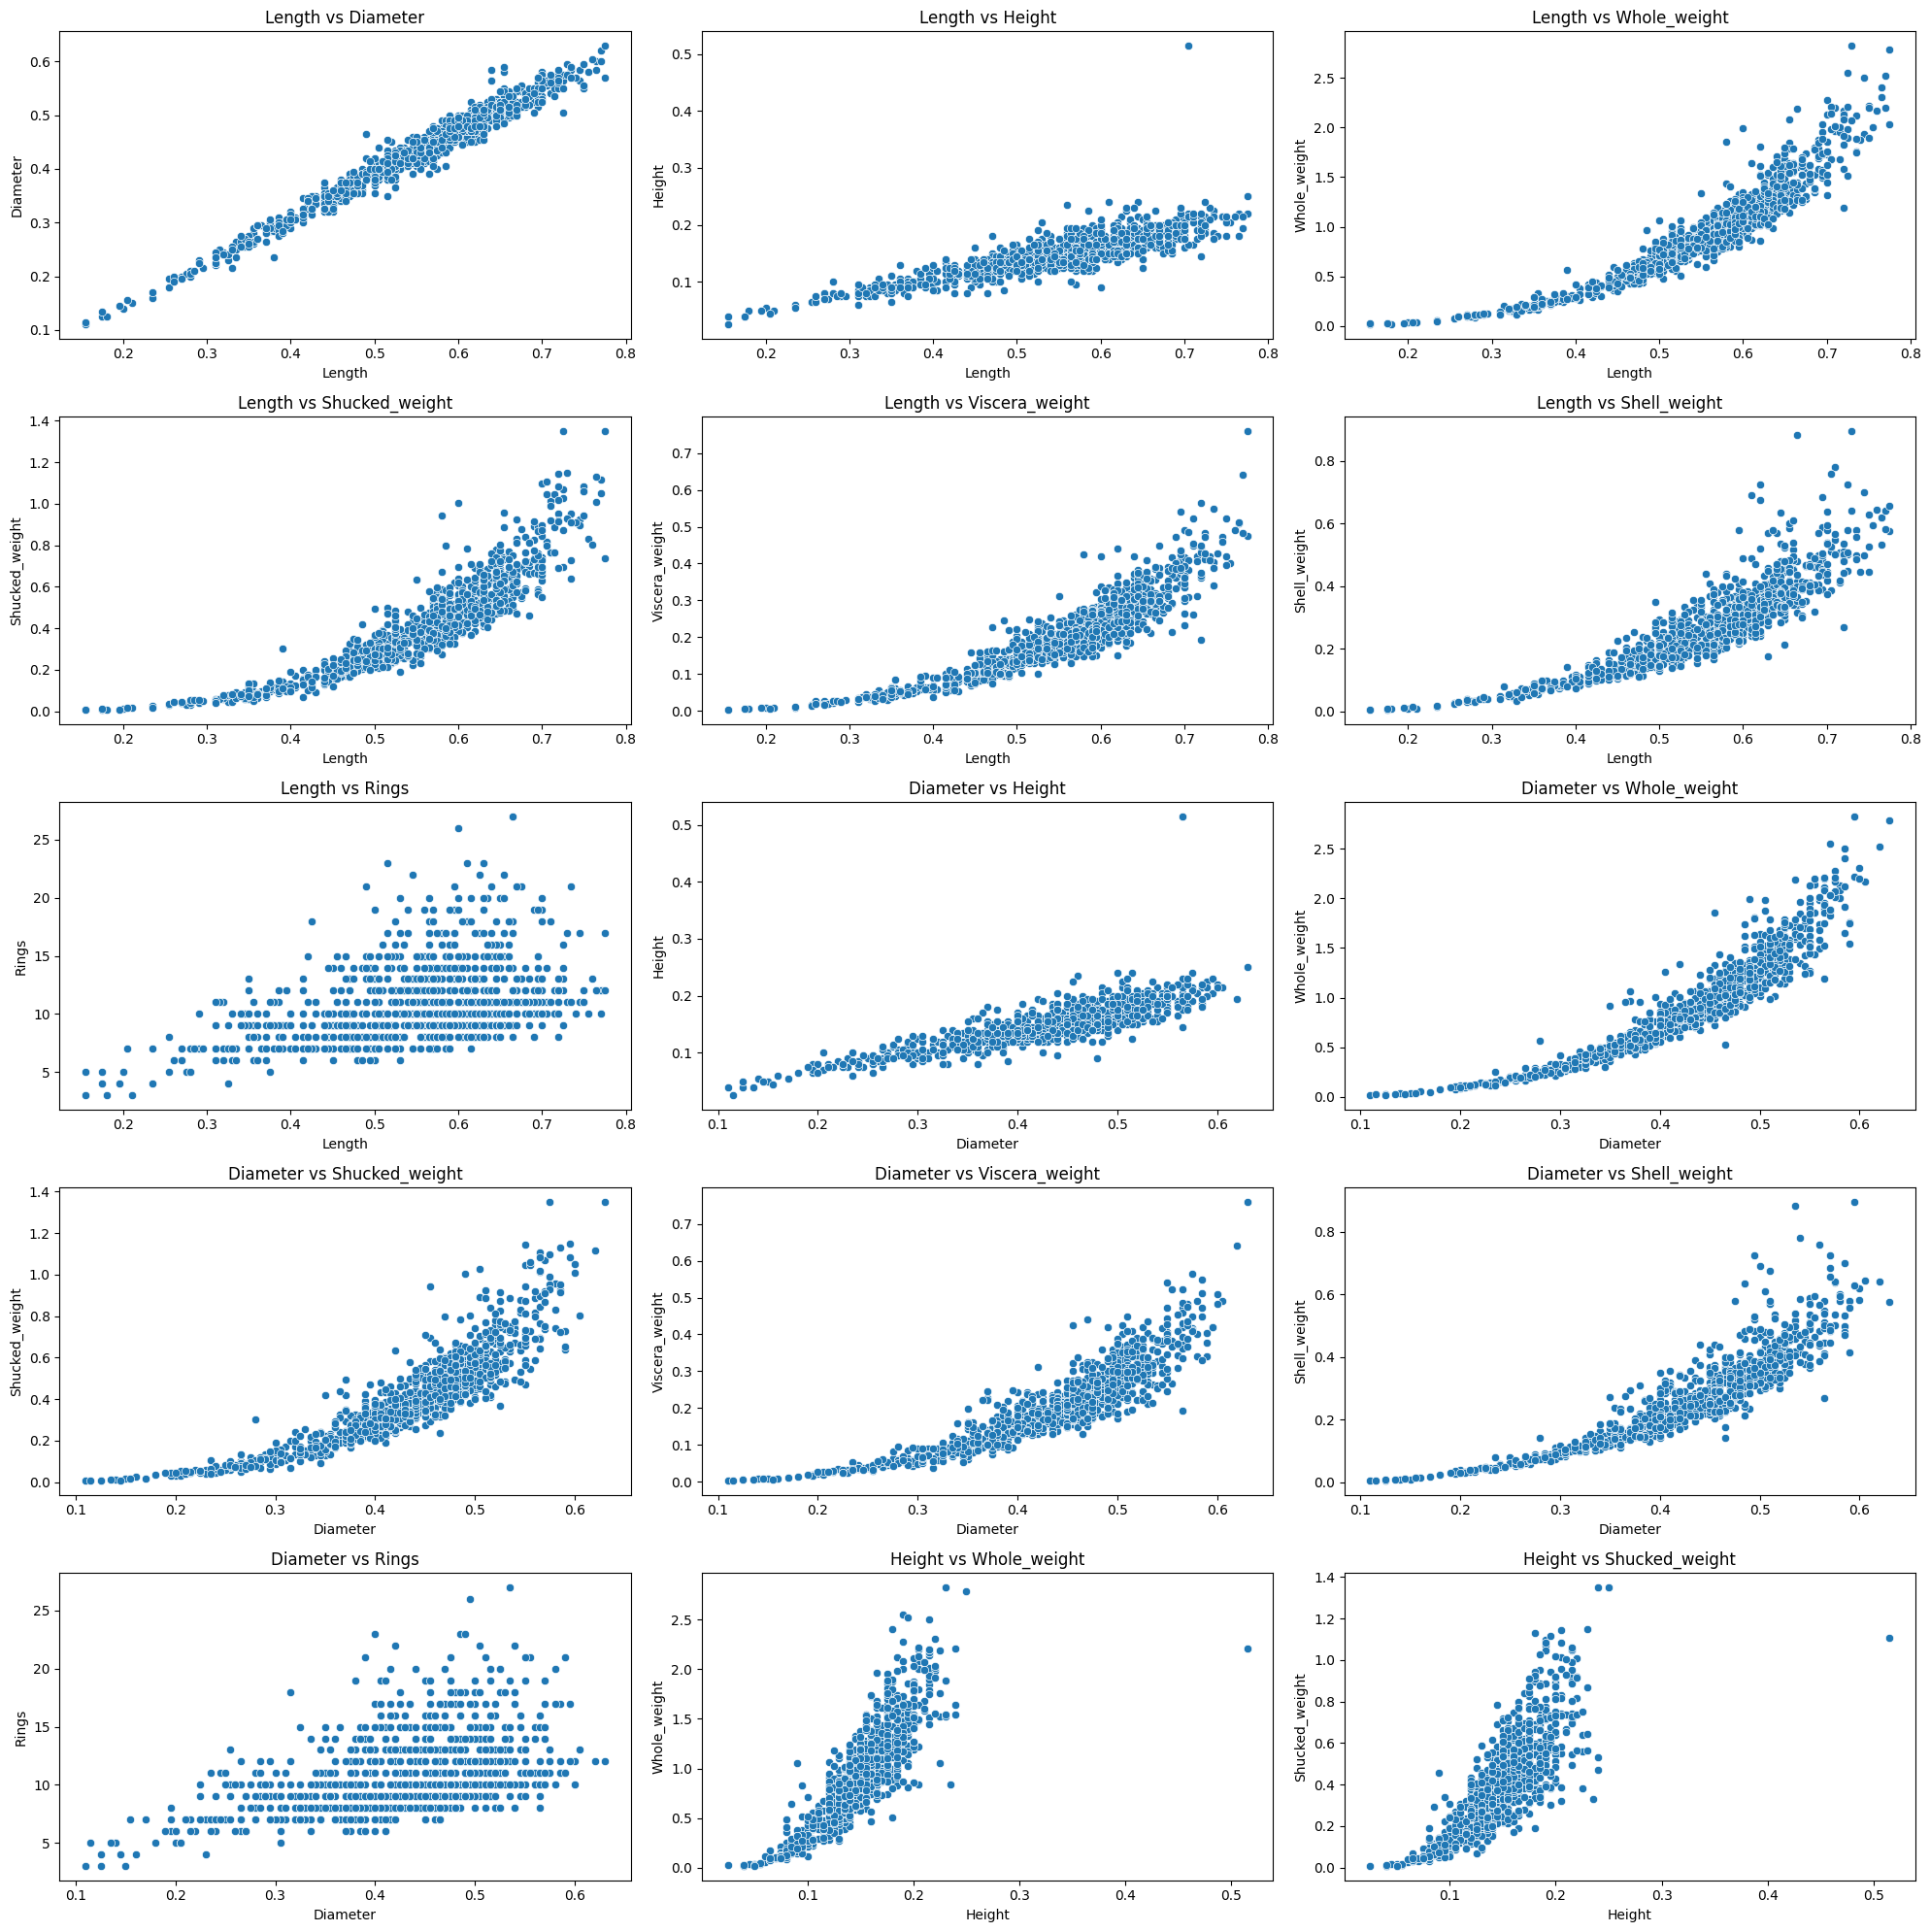

In [40]:
plot_scatter_plots(train_males, pairs)

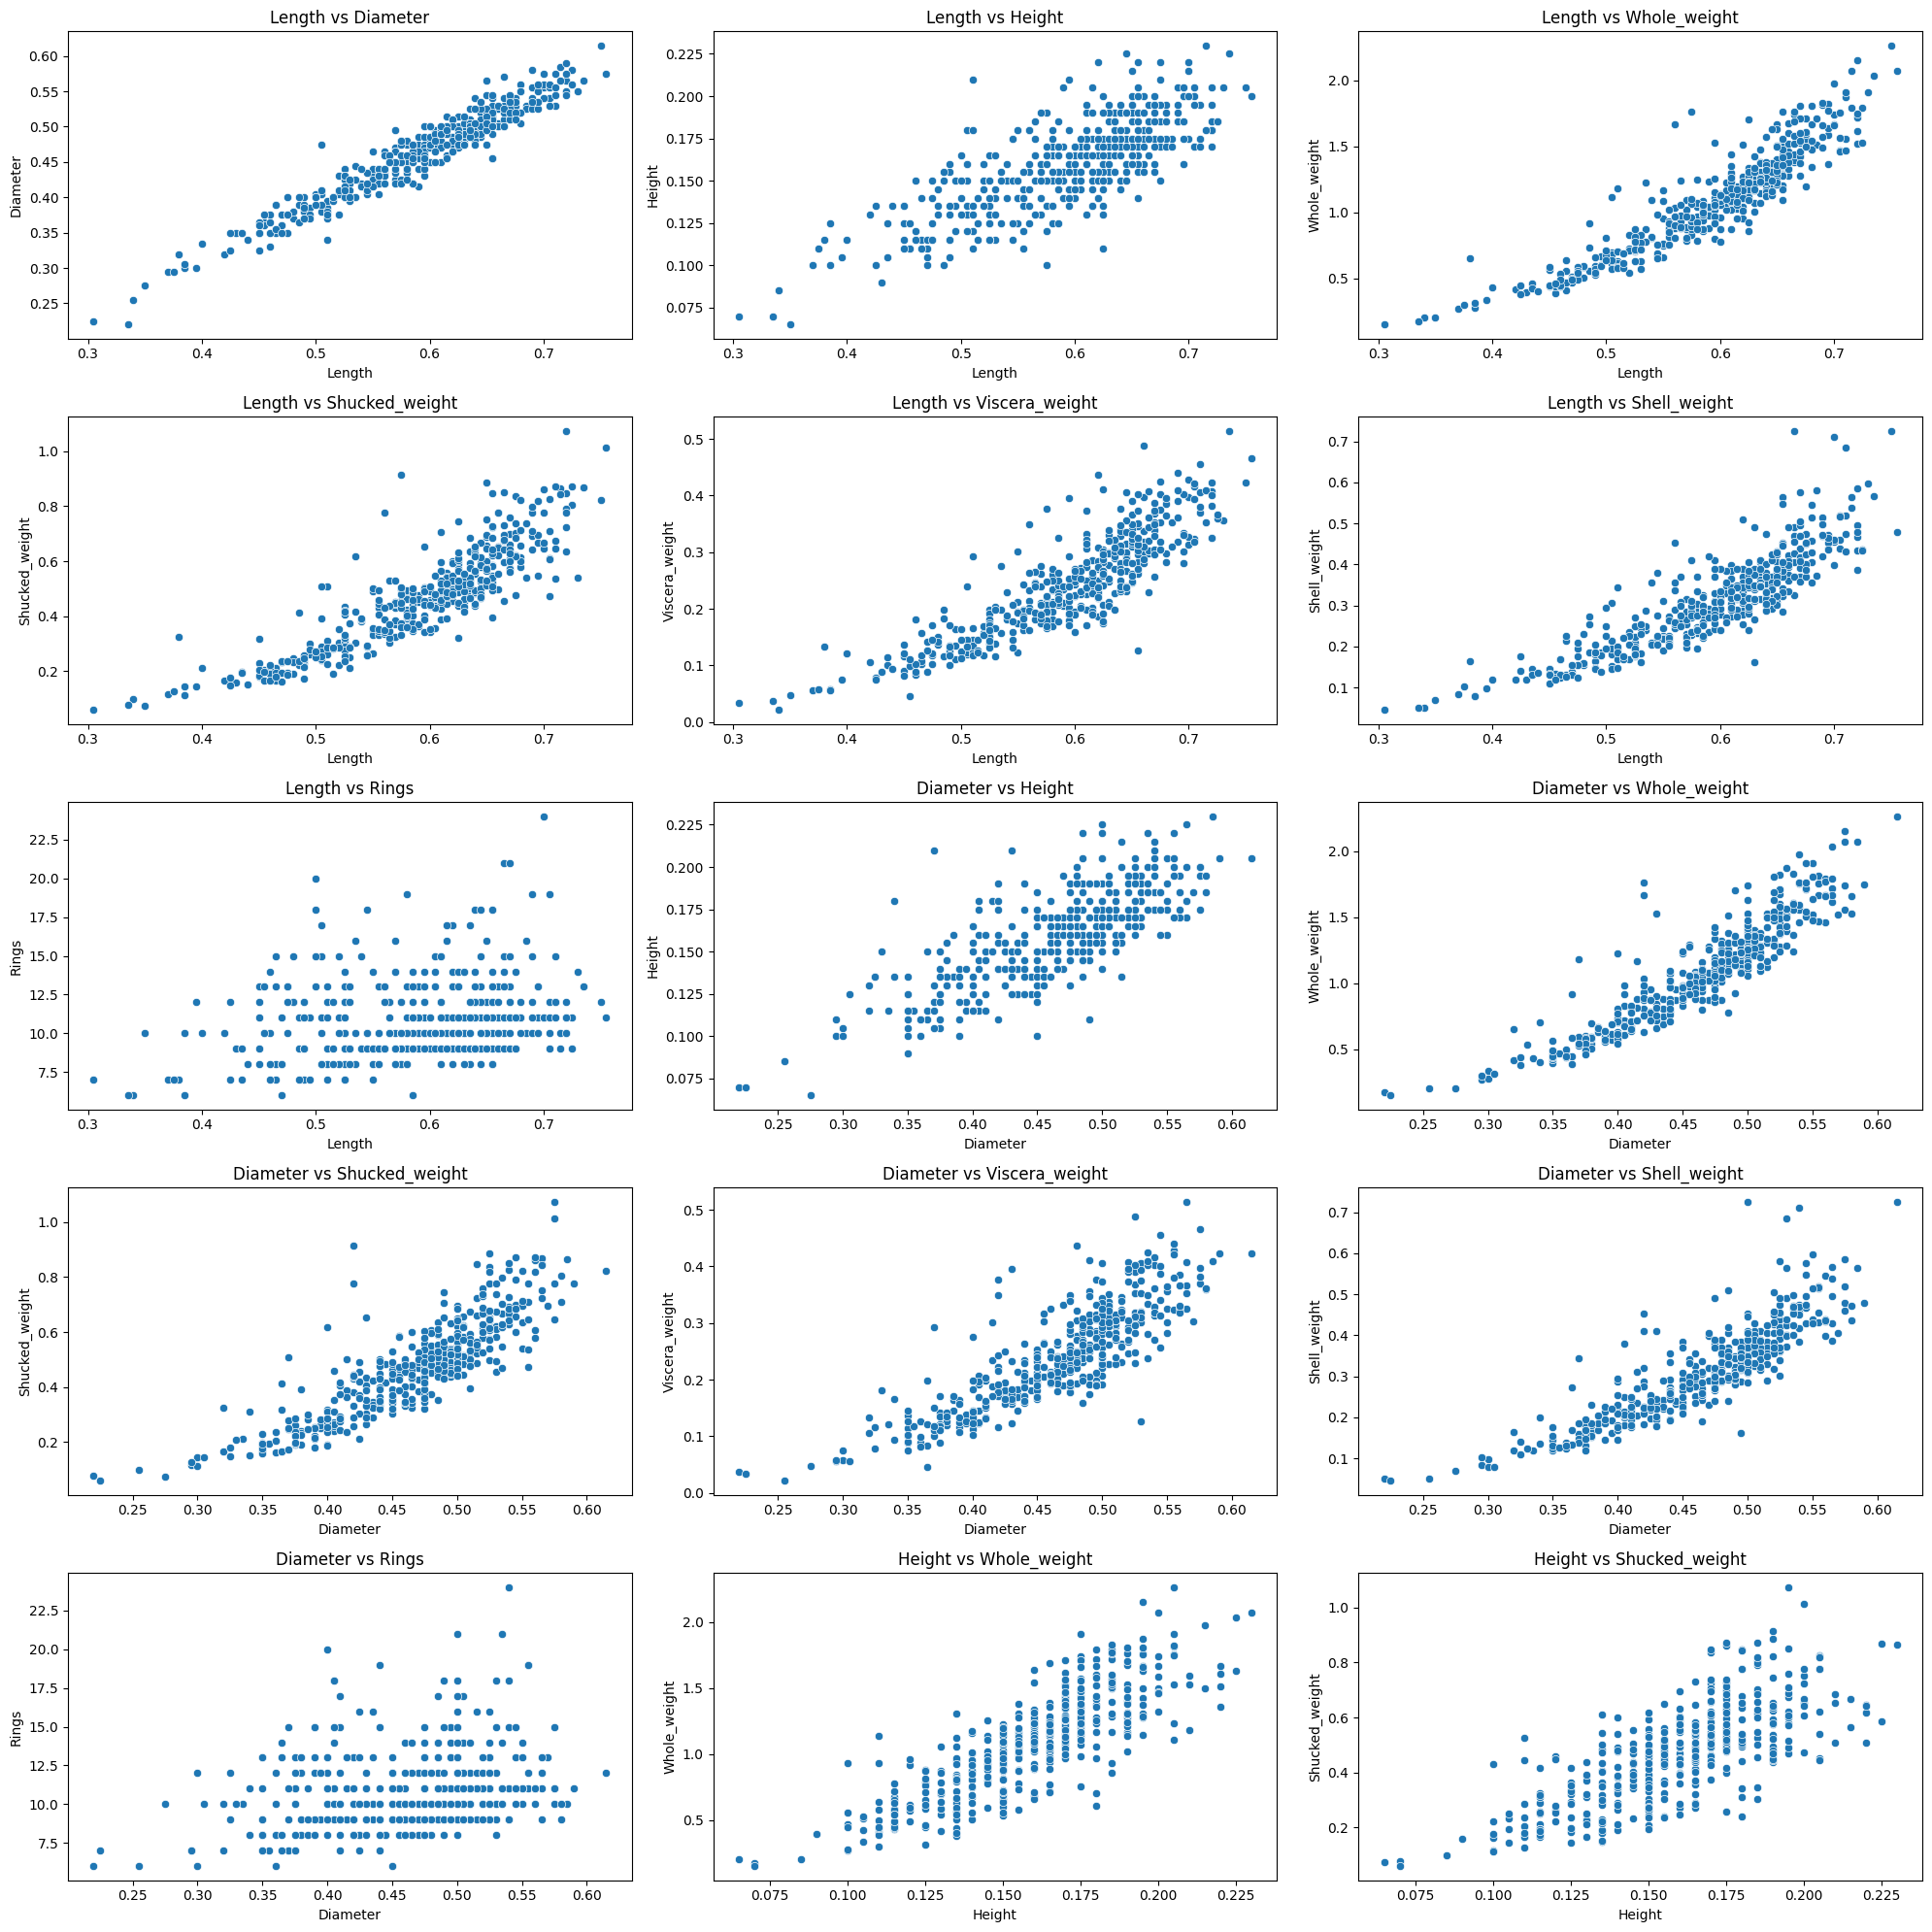

In [41]:
plot_scatter_plots(test_females, pairs)

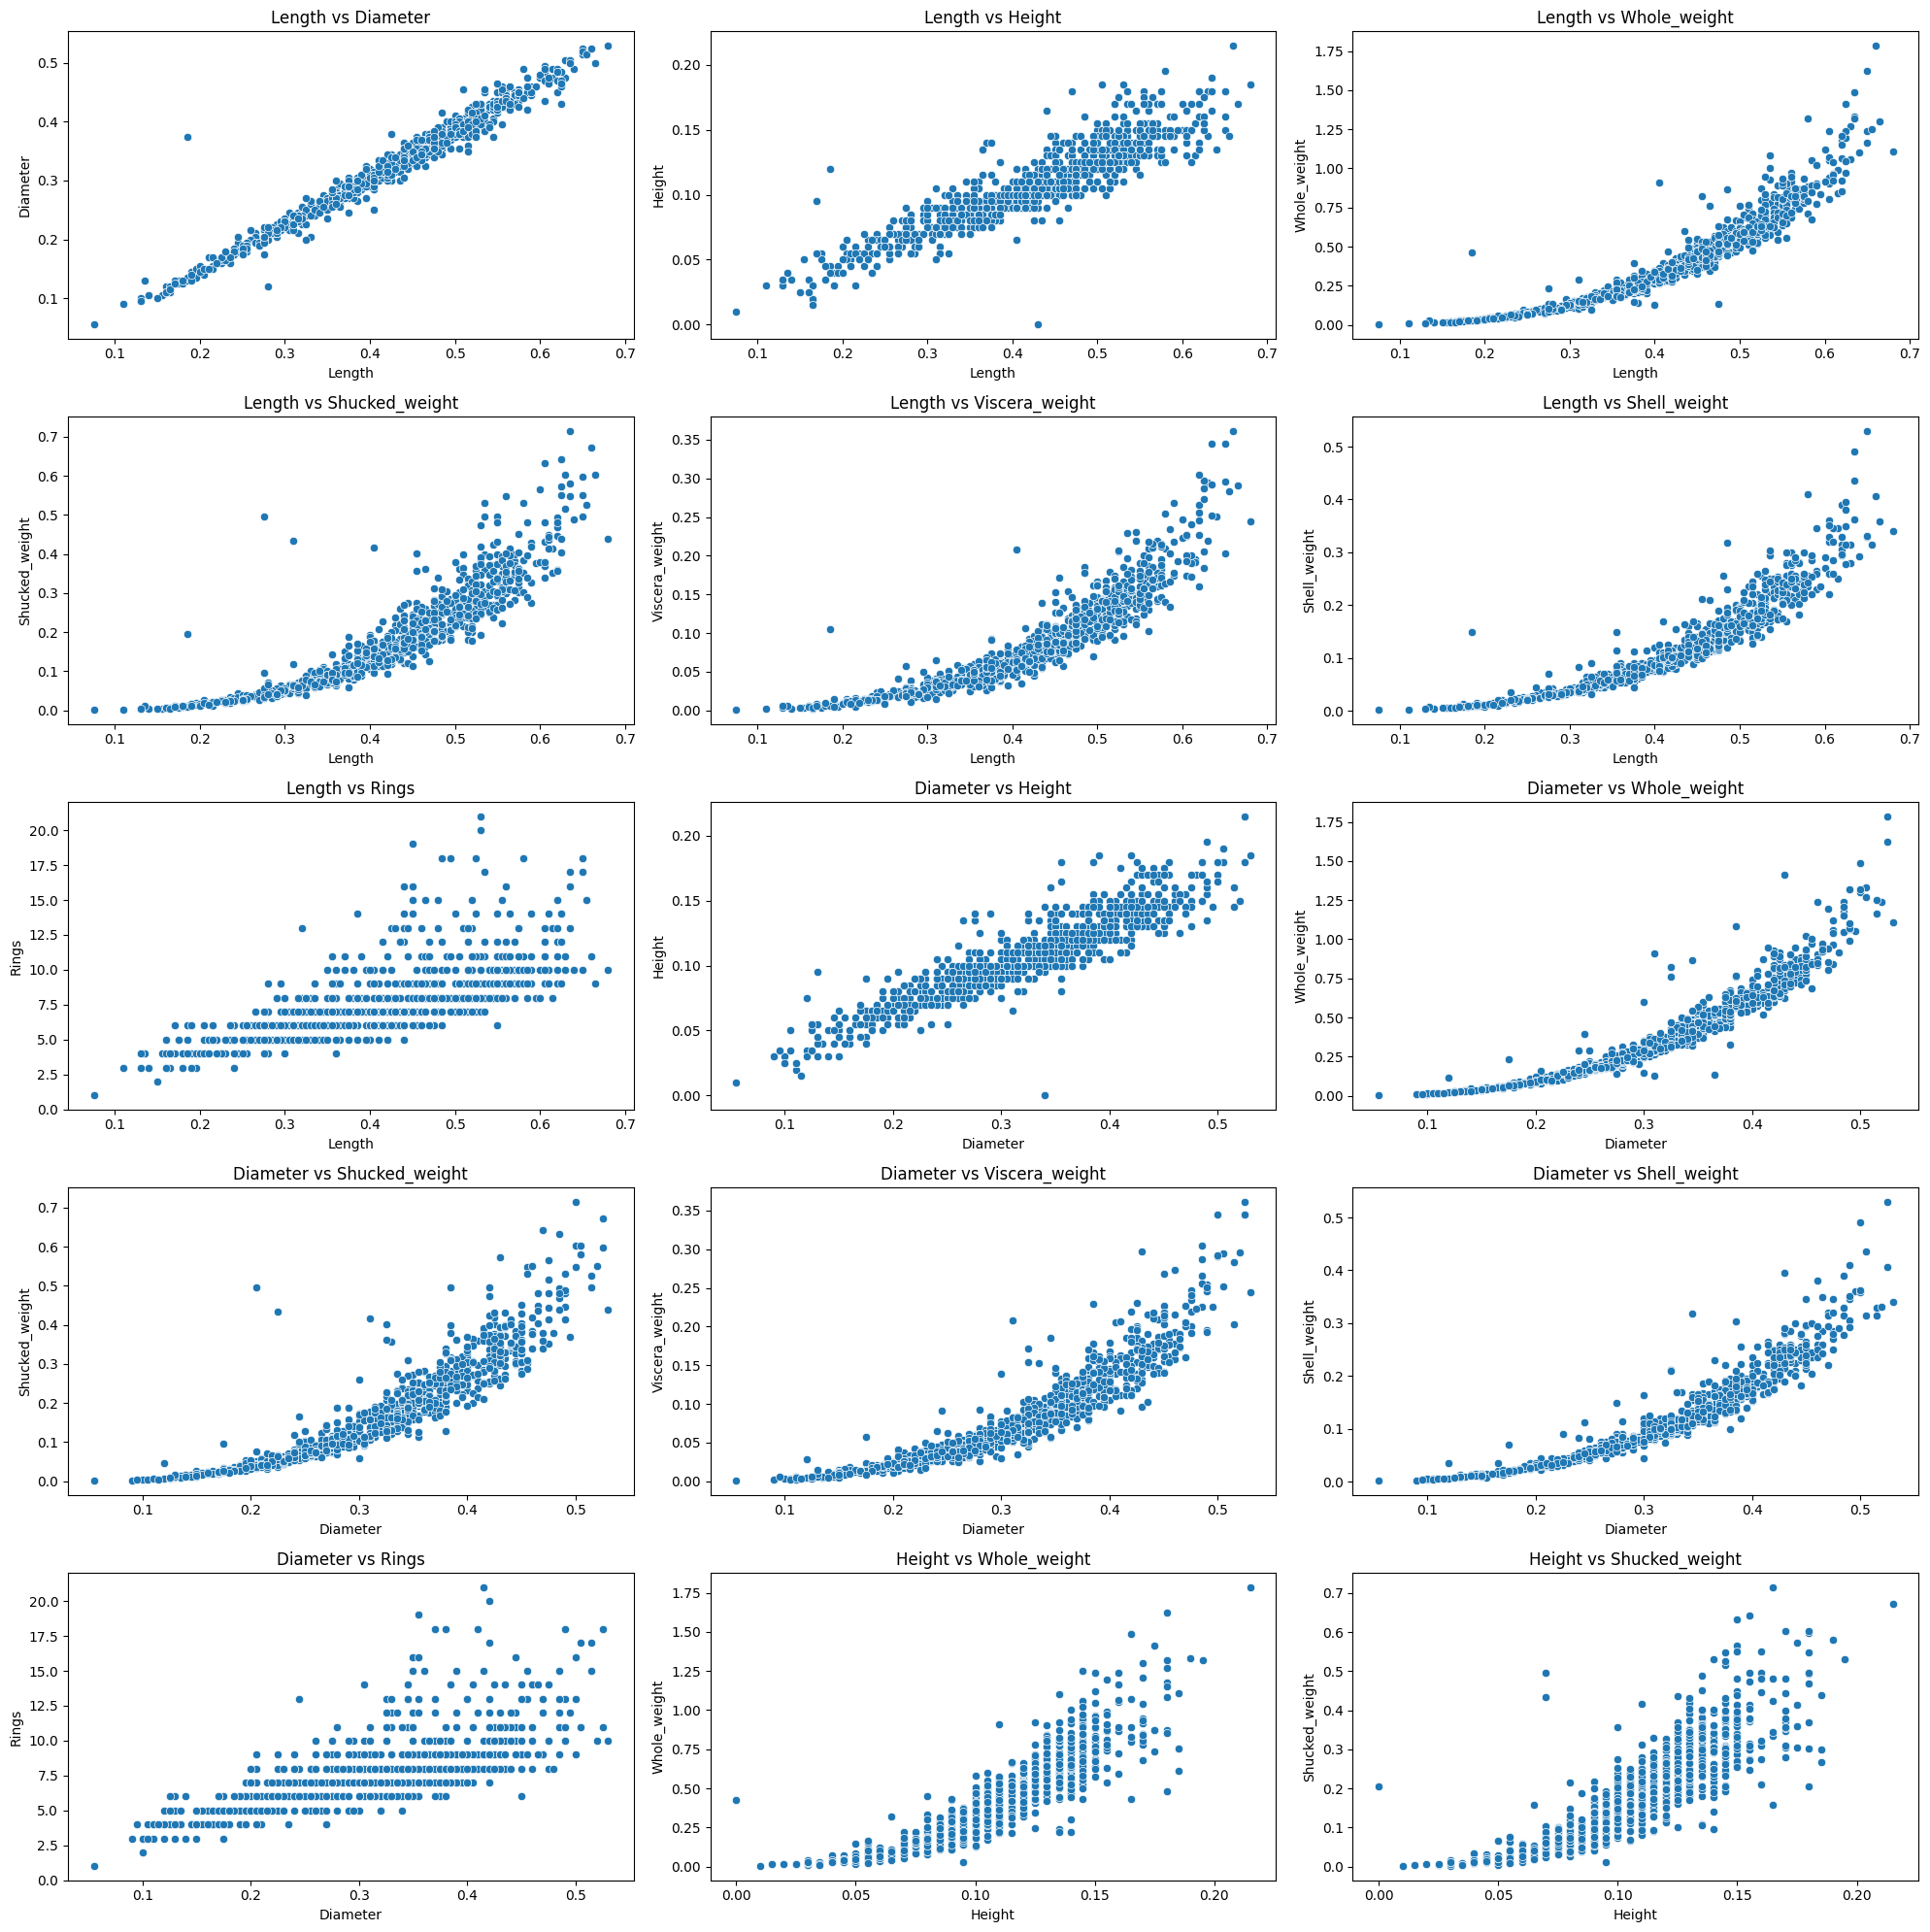

In [42]:
plot_scatter_plots(train_infants, pairs)

In [50]:
def top_5_correlations(X):
    correlation_matrix = X.corr()
    strongest_correlations = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
    return strongest_correlations.head(6)[1:]  

top_correlations_male = top_5_correlations(train_males[numerical_vars])
top_correlations_female = top_5_correlations(train_females[numerical_vars])
top_correlations_infant = top_5_correlations(train_infants[numerical_vars])


print("Correlation Male:" ,top_correlations_male)
print("Correlation Female:", top_correlations_female)
print("Correlation Infant:", top_correlations_infant)


Correlation Male: Diameter        Length          0.983548
Shucked_weight  Whole_weight    0.963284
Viscera_weight  Whole_weight    0.953701
Shell_weight    Whole_weight    0.942554
Whole_weight    Length          0.918175
dtype: float64
Correlation Female: Diameter        Length          0.973313
Shucked_weight  Whole_weight    0.950659
Viscera_weight  Whole_weight    0.945427
Whole_weight    Length          0.933615
Diameter        Whole_weight    0.932425
dtype: float64
Correlation Infant: Diameter        Length            0.985339
Viscera_weight  Whole_weight      0.973210
Whole_weight    Shell_weight      0.970535
Shucked_weight  Whole_weight      0.967570
Shell_weight    Viscera_weight    0.942311
dtype: float64


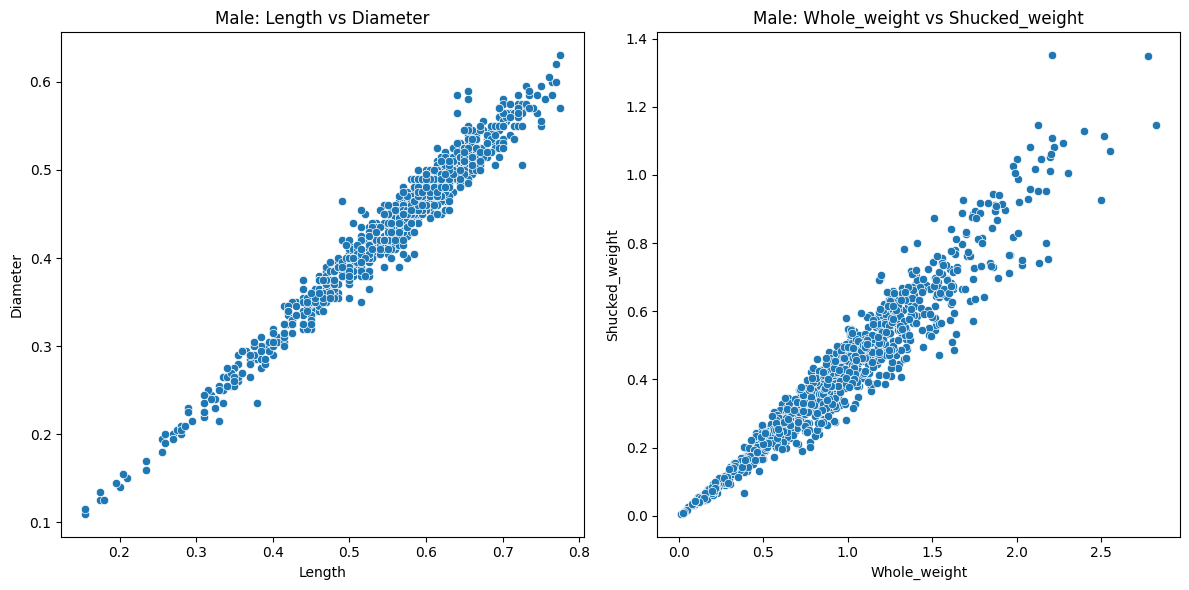

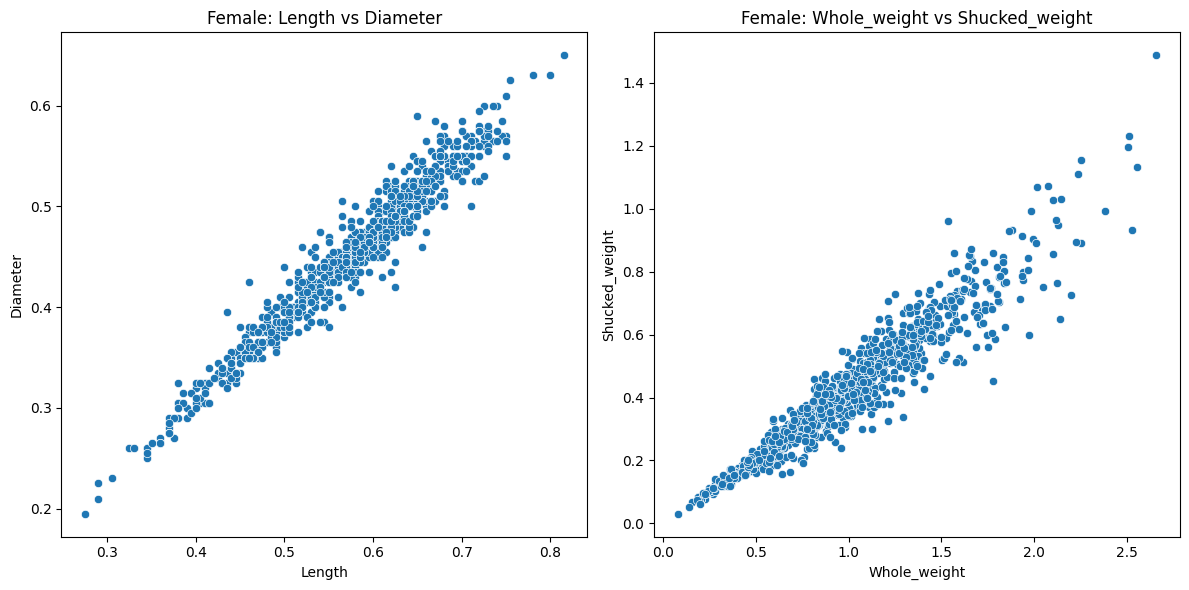

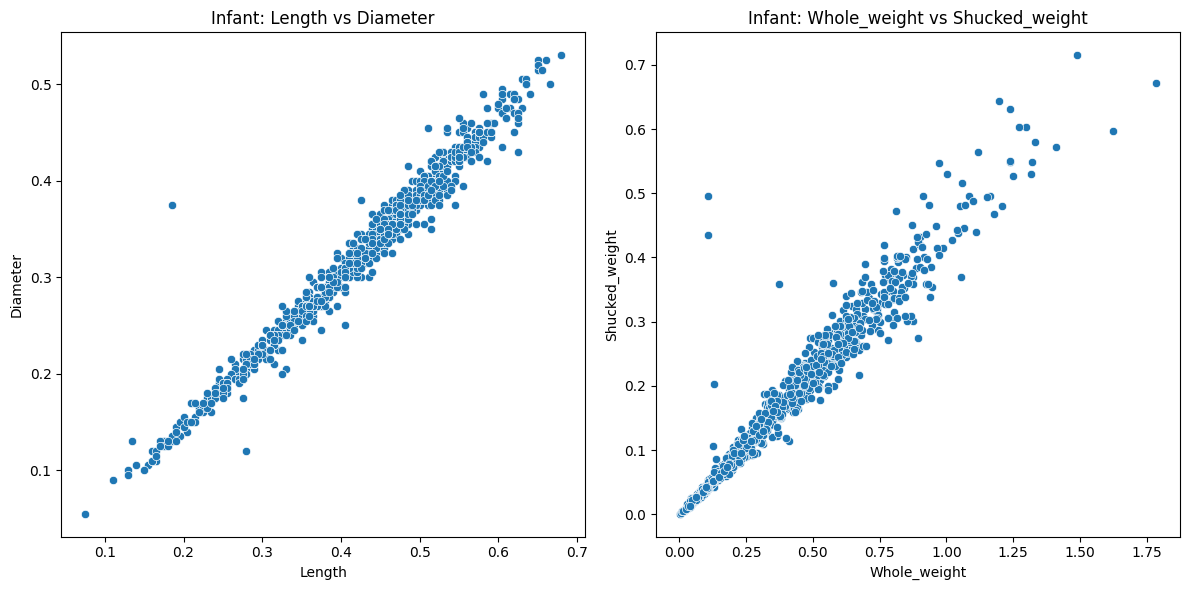

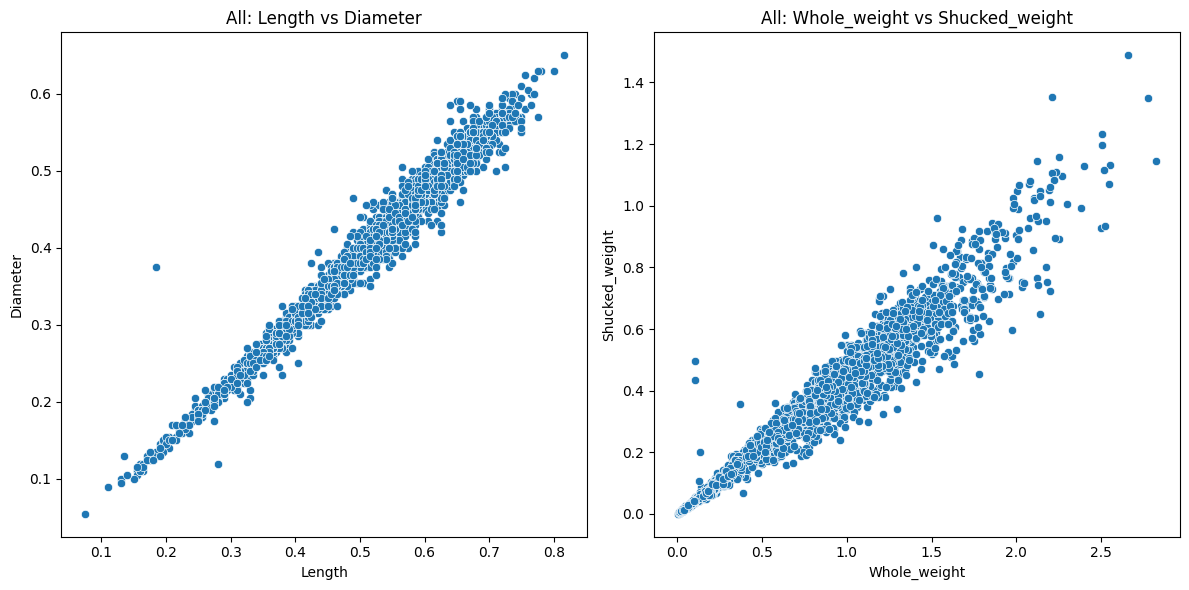

In [51]:

# Top correlation pairs for each category
top_pairs = {
    'Male': [('Length', 'Diameter'), ('Whole_weight', 'Shucked_weight')],
    'Female': [('Length', 'Diameter'), ('Whole_weight', 'Shucked_weight')],
    'Infant': [('Length', 'Diameter'), ('Whole_weight', 'Shucked_weight')],
    'All': [('Length', 'Diameter'), ('Whole_weight', 'Shucked_weight')]
}

# Datasets for each category
datasets = {
    'Male': train_males,
    'Female': train_females,
    'Infant': train_infants,
    'All': train_set
}

# Function to plot scatter plots for given pairs in a dataset
def plot_scatter_plots(category, df, pairs):
    plt.figure(figsize=(12, 6))
    for i, pair in enumerate(pairs):
        plt.subplot(1, len(pairs), i + 1)
        sns.scatterplot(x=df[pair[0]], y=df[pair[1]])
        plt.title(f'{category}: {pair[0]} vs {pair[1]}')
    plt.tight_layout()
    plt.show()

# Create scatter plots for each category
for category, pairs in top_pairs.items():
    plot_scatter_plots(category, datasets[category], pairs)


In [52]:
# Function to build and evaluate a linear regression model
def build_and_evaluate_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return model.coef_[0], model.intercept_, mse

# Variables for the regression models
variable_pairs = [('Length', 'Diameter'), ('Whole_weight', 'Shucked_weight')]

# Datasets for each gender
train_sets = {'Male': train_males, 'Female': train_females, 'Infant': train_infants}
test_sets = {'Male': test_males, 'Female': test_females, 'Infant': test_infants}

# Results dictionary to store the outcomes
results = {}

# Building and evaluating models for each gender and variable pair
for gender in train_sets:
    results[gender] = {}
    for predictor, target in variable_pairs:
        X_train = train_sets[gender][[predictor]]
        y_train = train_sets[gender][target]
        X_test = test_sets[gender][[predictor]]
        y_test = test_sets[gender][target]

        coef, intercept, mse = build_and_evaluate_model(X_train, y_train, X_test, y_test)
        results[gender][f'{predictor} vs {target}'] = {'Coefficient': coef, 'Intercept': intercept, 'MSE': mse}

results


{'Male': {'Length vs Diameter': {'Coefficient': 0.8108150158508809,
   'Intercept': -0.015379856613561338,
   'MSE': 0.00027163763658954895},
  'Whole_weight vs Shucked_weight': {'Coefficient': 0.45050124132028163,
   'Intercept': -0.016311694654806974,
   'MSE': 0.004145855755886625}},
 'Female': {'Length vs Diameter': {'Coefficient': 0.8056119606771964,
   'Intercept': -0.011294087002622688,
   'MSE': 0.0002931828807964794},
  'Whole_weight vs Shucked_weight': {'Coefficient': 0.43956044149698525,
   'Intercept': -0.016362796693470905,
   'MSE': 0.0034786006550322577}},
 'Infant': {'Length vs Diameter': {'Coefficient': 0.796687814948771,
   'Intercept': -0.014105817189640601,
   'MSE': 0.0001822076124565648},
  'Whole_weight vs Shucked_weight': {'Coefficient': 0.4365441865221978,
   'Intercept': 0.003112739111862217,
   'MSE': 0.000895396690770872}}}

# Build one-variable regression models for Abalone “Rings” 


In [53]:


# Variables to be tested as predictors for 'Rings'
predictor_vars = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']


mse_results = {}

# Function to build a linear regression model and compute MSE
def build_regression_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# Building regression models for each predictor variable
for var in predictor_vars:
    X_train = train_set[[var]]
    y_train = train_set['Rings']
    X_test = test_set[[var]]
    y_test = test_set['Rings']

    mse_results[var] = build_regression_model(X_train, y_train, X_test, y_test)

# Identifying the best predictor based on the lowest MSE
best_predictor = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_predictor]

# Building the best regression model to get its coefficients
X_train_best = train_set[[best_predictor]]
y_train_best = train_set['Rings']
model_best = LinearRegression()
model_best.fit(X_train_best, y_train_best)
best_coef = model_best.coef_[0]
best_intercept = model_best.intercept_

best_predictor, best_coef, best_intercept, best_mse


('Height', 42.147381571747715, 4.156014891418512, 5.210967909889275)

In [ ]:
Best Regression Model: Height as a Predictor
1: Predictor Variable: Height
2: Regression Coefficient: 42.1474
3: Intercept: 4.1560
4: Mean Squared Error (MSE): 5.2110

Regression Equation:

The regression equation for this model is:

Rings = 42.1474 × Height + 4.1560
